# Problem Statement

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

Importing required Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels
from scipy.special import comb
from scipy.stats import binom,norm, expon, poisson,t

Loading our dataset

In [2]:
df=pd.read_csv("walmart_data.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


# Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category', statistical summary

In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df["Marital_Status"]=df["Marital_Status"].astype("object")
df["Product_Category"]=df["Product_Category"].astype("object")
df["Occupation"]=df["Occupation"].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [6]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [7]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [8]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [9]:
df["Product_ID"].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [10]:
df["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [11]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [12]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [13]:
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [14]:
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [15]:
df["Purchase"].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [16]:
data=df.groupby(["User_ID","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status"])["Purchase"].sum()

In [17]:
data=data.reset_index()

In [18]:
data["Age"].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     5891 non-null   int64 
 1   Gender                      5891 non-null   object
 2   Age                         5891 non-null   object
 3   Occupation                  5891 non-null   int64 
 4   City_Category               5891 non-null   object
 5   Stay_In_Current_City_Years  5891 non-null   object
 6   Marital_Status              5891 non-null   int64 
 7   Purchase                    5891 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 368.3+ KB


In [20]:
data.nunique()

User_ID                       5891
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Purchase                      5876
dtype: int64

In [21]:
data["Gender"].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [22]:
data["Occupation"].value_counts()

4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: Occupation, dtype: int64

In [23]:
data["Marital_Status"].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

In [24]:
data["City_Category"].value_counts()

C    3139
B    1707
A    1045
Name: City_Category, dtype: int64

In [25]:
data["Stay_In_Current_City_Years"].value_counts()

1     2086
2     1145
3      979
4+     909
0      772
Name: Stay_In_Current_City_Years, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [27]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [28]:
df.describe(include=object)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     5891 non-null   int64 
 1   Gender                      5891 non-null   object
 2   Age                         5891 non-null   object
 3   Occupation                  5891 non-null   int64 
 4   City_Category               5891 non-null   object
 5   Stay_In_Current_City_Years  5891 non-null   object
 6   Marital_Status              5891 non-null   int64 
 7   Purchase                    5891 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 368.3+ KB


In [30]:
data.describe()

,User_ID,Occupation,Marital_Status,Purchase
count,5.891000e+03,5891.000000,5891.000000,5.891000e+03
mean,1.003025e+06,8.153285,0.419963,8.650166e+05
std,1.743379e+03,6.323140,0.493594,9.436445e+05
min,1.000001e+06,0.000000,0.000000,4.668100e+04
25%,1.001518e+06,3.000000,0.000000,2.376780e+05
50%,1.003026e+06,7.000000,0.000000,5.212130e+05
75%,1.004532e+06,14.000000,1.000000,1.119250e+06
max,1.006040e+06,20.000000,1.000000,1.053691e+07


In [31]:
data.describe(include=object)

,Gender,Age,City_Category,Stay_In_Current_City_Years
count,5891,5891,5891,5891
unique,2,7,3,5
top,M,26-35,C,1
freq,4225,2053,3139,2086


# Dataset

* User_ID: It is a unique id assigned to each customer
* Product_ID: It is a unique id assigned to each product
* Gender: It shows the gender of the user which consists of 'M' or 'F'
* Age: It contains Age in bins. It has a total of  7 bins
* Occupation: It contains masked occupations of customers and it has 21 categories
* City_Category: It divides the customer's city into A, B, or C category
* StayInCurrentCItyYears: It divides customers based on how long the customer staying in the current city It has 5 categories
* Marital_Status: It gives the customer's marital status as 0 or 1.
* Product_Category: It contains a product category that has a total of 20 categories.
* Purchase: It contains the amount per transaction. It ranges from 12 to 23961.

# Visual Analysis

<AxesSubplot: xlabel='Gender', ylabel='count'>

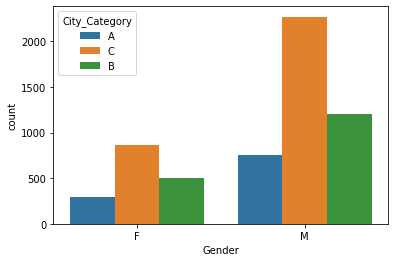

In [32]:
sns.countplot(data=data, x="Gender",hue="City_Category")

<AxesSubplot: xlabel='Gender', ylabel='count'>

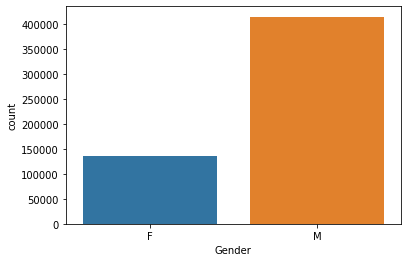

In [33]:
sns.countplot(data=df, x="Gender")

C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_19160\1836366593.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Purchase"],bins=50)


<AxesSubplot: xlabel='Purchase', ylabel='Density'>

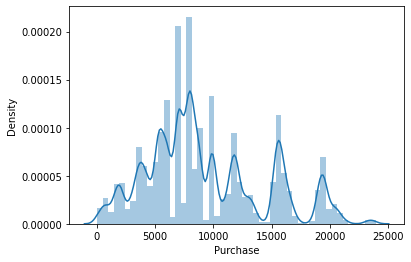

In [34]:
sns.distplot(df["Purchase"],bins=50)

<AxesSubplot: xlabel='Purchase', ylabel='Count'>

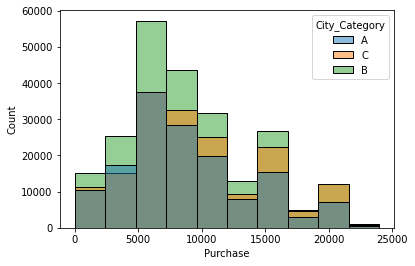

In [35]:
sns.histplot(data=df, x="Purchase", hue="City_Category",bins=10)

<AxesSubplot: xlabel='City_Category', ylabel='count'>

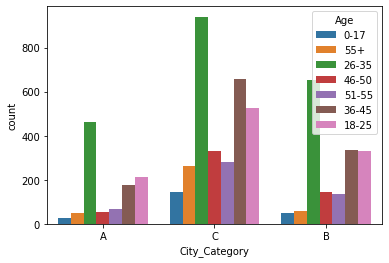

In [36]:
sns.countplot(data=data, x="City_Category", hue="Age")

<AxesSubplot: xlabel='City_Category', ylabel='count'>

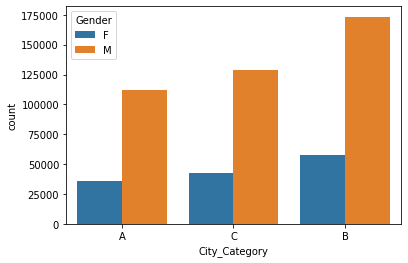

In [37]:
sns.countplot(data=df, x="City_Category",hue="Gender")

<AxesSubplot: xlabel='City_Category', ylabel='count'>

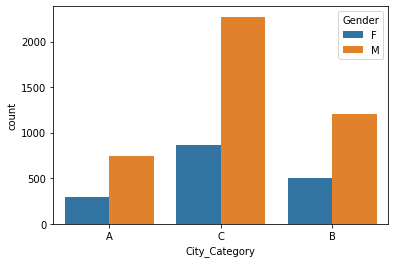

In [38]:
sns.countplot(data=data, x="City_Category", hue="Gender")

<AxesSubplot: >

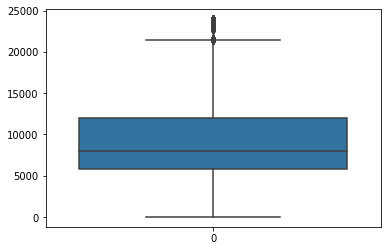

In [39]:
sns.boxplot(df["Purchase"])

<AxesSubplot: xlabel='Product_Category', ylabel='Purchase'>

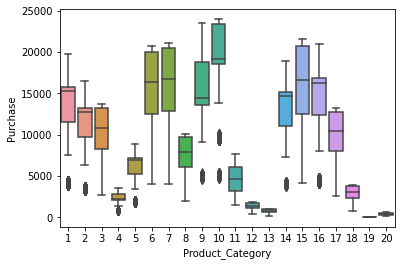

In [40]:
sns.boxplot(data=df,y="Purchase", x="Product_Category")

In [41]:
temp=pd.crosstab(index=df["Age"],columns=[df["Stay_In_Current_City_Years"]])
temp

Stay_In_Current_City_Years,0,1,2,3,4+
Age,,,,,
0-17,2210,4925,3550,2765,1652
18-25,16582,32316,19251,15393,16118
26-35,27709,77469,39854,39478,35077
36-45,13914,37074,21056,22992,14977
46-50,6693,17912,7921,5996,7179
51-55,4380,16966,6104,5023,6028
55+,2910,7159,4102,3638,3695


<AxesSubplot: xlabel='Stay_In_Current_City_Years', ylabel='Age'>

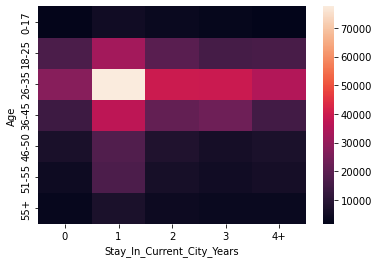

In [42]:
sns.heatmap(temp)

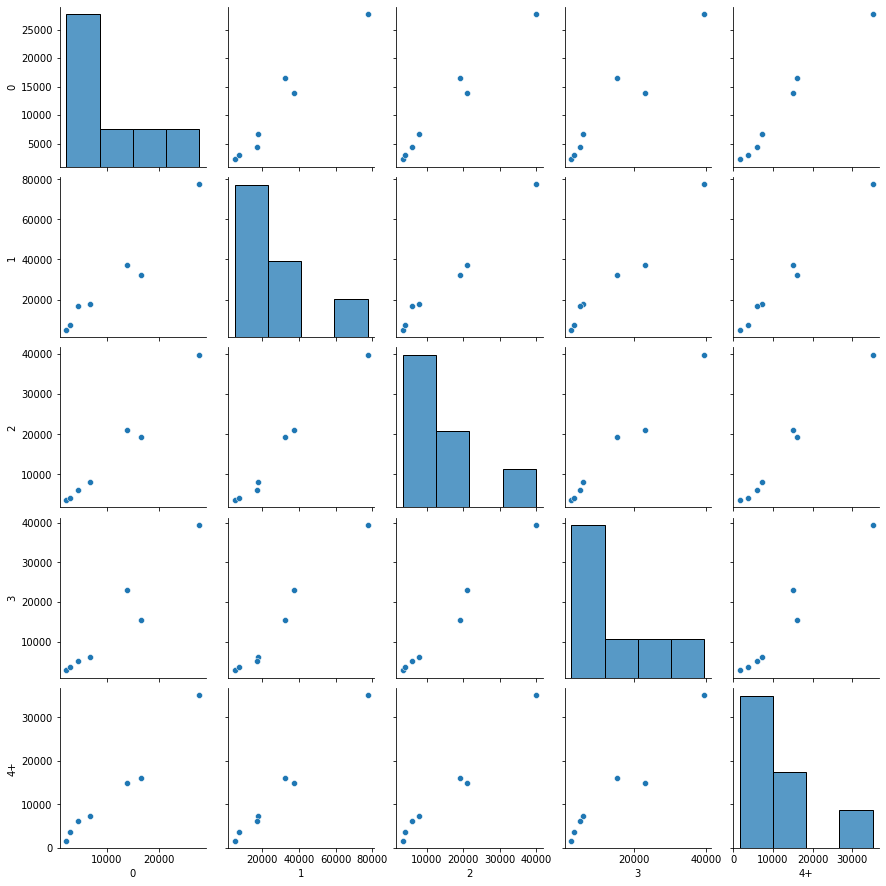

In [43]:
sns.pairplot(temp)

In [44]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

<AxesSubplot: >

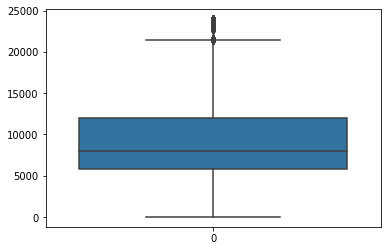

In [45]:
sns.boxplot(df["Purchase"])

<AxesSubplot: xlabel='Age', ylabel='Purchase'>

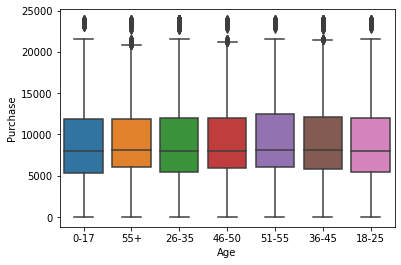

In [46]:
sns.boxplot(x=df["Age"],y=df["Purchase"])

<AxesSubplot: xlabel='Gender', ylabel='Purchase'>

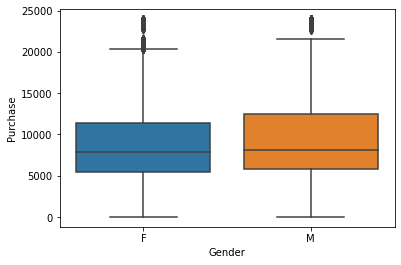

In [47]:
sns.boxplot(x=df["Gender"],y=df["Purchase"])

<AxesSubplot: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

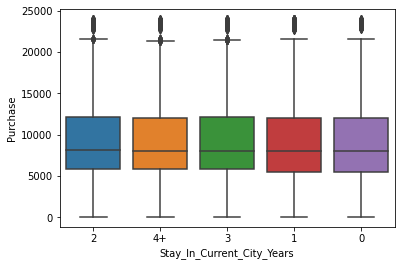

In [48]:
sns.boxplot(x=df["Stay_In_Current_City_Years"],y=df["Purchase"])

<AxesSubplot: xlabel='City_Category', ylabel='Purchase'>

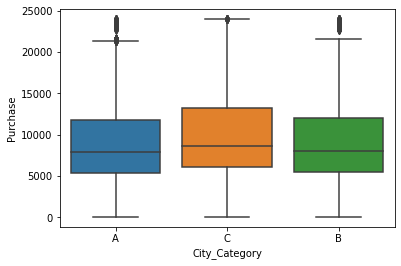

In [49]:
sns.boxplot(x=df["City_Category"],y=df["Purchase"])

<AxesSubplot: xlabel='Marital_Status', ylabel='Purchase'>

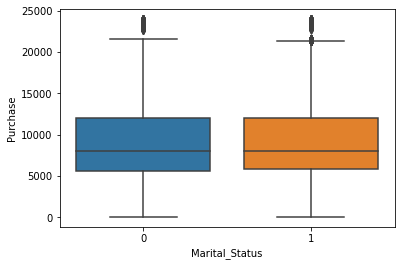

In [50]:
sns.boxplot(x=df["Marital_Status"],y=df["Purchase"])

<AxesSubplot: xlabel='Product_Category', ylabel='Purchase'>

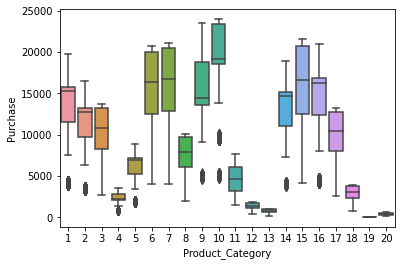

In [51]:
sns.boxplot(x=df["Product_Category"],y=df["Purchase"])

* From the Outliers detection based on different categorical attributes, It has been found that an outlier for one attribute is not an outlier for another attribute. For example, Outliers in Purchase attribute based on City_Category are on the upper side of the upper whiskers whereas outliers based on Product_Category are on the lower side of the lower whiskers. So treating them as outliers can lead us to miss valuable insights.

# Confidence Interval for Male and Female Customer

In [52]:
male=df.loc[df["Gender"]=="M","Purchase"]
male.mean(),male.std()

(9437.526040472265, 5092.18620977797)

<AxesSubplot: ylabel='Count'>

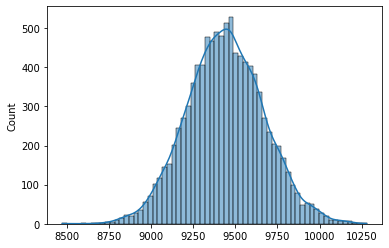

In [53]:
#Confidence Interval for Men
n=500
sample_500_M=[]
for i in range(10000):
    sample_mean=np.random.choice(male, size=n).mean()
    sample_500_M.append(sample_mean)
sns.histplot(sample_500_M,kde=True)

In [54]:
np.mean(sample_500_M),np.std(sample_500_M)

(9441.4603258, 228.09007028486235)

In [55]:
#95% Confidence Interval for men
CI_500_95_M=np.percentile(sample_500_M,[2.5,97.5])
CI_500_95_M

array([9003.1271, 9899.3496])

In [56]:
#90% Confidence Interval for men
CI_500_90_M=np.percentile(sample_500_M,[5,95])
CI_500_90_M

array([9068.2825, 9818.8311])

In [57]:
#99% Confidence Interval for men
CI_500_99_M=np.percentile(sample_500_M,[.5,99.5])
CI_500_99_M

array([ 8854.75914, 10038.70426])

<AxesSubplot: ylabel='Count'>

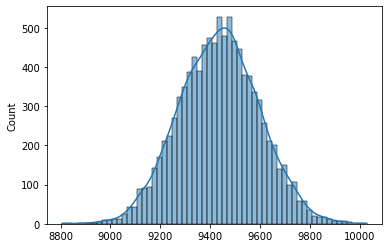

In [58]:
n=1000
sample_1000_M=[]
for i in range(10000):
    sample_mean=np.random.choice(male, size=n).mean()
    sample_1000_M.append(sample_mean)
sns.histplot(sample_1000_M,kde=True)

In [59]:
np.mean(sample_1000_M),np.std(sample_1000_M)

(9436.0170722, 159.56568415862725)

In [60]:
#95% Confidence Interval for men
CI_1000_95_M=np.percentile(sample_1000_M,[2.5,97.5])
CI_1000_95_M

array([9124.8449  , 9746.399525])

In [61]:
#90% Confidence Interval for men
CI_1000_90_M=np.percentile(sample_1000_M,[5,95])
CI_1000_90_M

array([9175.96165, 9699.77935])

In [62]:
#99% Confidence Interval for men
CI_1000_99_M=np.percentile(sample_1000_M,[.5,99.5])
CI_1000_99_M

array([9038.25147, 9852.03369])

<AxesSubplot: ylabel='Count'>

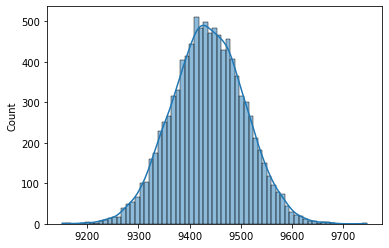

In [63]:
n=5000
sample_5000_M=[]
for i in range(10000):
    sample_mean=np.random.choice(male, size=n).mean()
    sample_5000_M.append(sample_mean)
sns.histplot(sample_5000_M,kde=True)

In [64]:
np.mean(sample_5000_M),np.std(sample_5000_M)

(9435.968530819999, 71.00759590239045)

In [65]:
#95% Confidence Interval for men
CI_5000_95_M=np.percentile(sample_5000_M,[2.5,97.5])
CI_5000_95_M

array([9297.46214, 9573.98808])

In [66]:
#90% Confidence Interval for men
CI_5000_90_M=np.percentile(sample_5000_M,[5,95])
CI_5000_90_M

array([9320.52089, 9551.55854])

In [67]:
#99% Confidence Interval for men
CI_5000_99_M=np.percentile(sample_5000_M,[.5,99.5])
CI_5000_99_M

array([9251.745731, 9616.103942])

<AxesSubplot: ylabel='Count'>

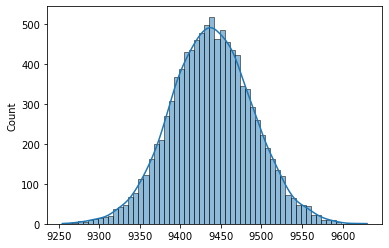

In [68]:
n=10000
sample_10000_M=[]
for i in range(10000):
    sample_mean=np.random.choice(male, size=n).mean()
    sample_10000_M.append(sample_mean)
sns.histplot(sample_10000_M,kde=True)

In [69]:
np.mean(sample_10000_M),np.std(sample_10000_M)

(9438.57477885, 50.55167156904946)

In [70]:
#95% Confidence Interval for men
CI_10000_95_M=np.percentile(sample_10000_M,[2.5,97.5])
CI_10000_95_M

array([9339.330605, 9539.37921 ])

In [71]:
#90% Confidence Interval for men
CI_10000_90_M=np.percentile(sample_10000_M,[5,95])
CI_10000_90_M

array([9355.76408, 9522.30705])

In [72]:
#99% Confidence Interval for men
CI_10000_99_M=np.percentile(sample_10000_M,[.5,99.5])
CI_10000_99_M

array([9305.3641855, 9570.139239 ])

Text(0, 0.5, 'Sample Mean')

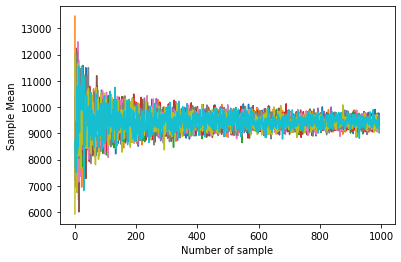

In [73]:
male_mean_trend=[]
for i in range(10):
    for n in range(5,1000):
        sample_mean=df.loc[df["Gender"]=="M","Purchase"].sample(n).mean()
        male_mean_trend.append(sample_mean)
    plt.plot(male_mean_trend)
    male_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

Text(0, 0.5, 'Sample Mean')

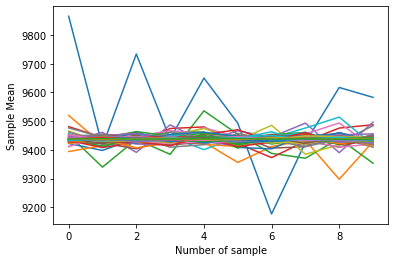

In [74]:
male_mean_trend=[]
for n in range(500,len(df.loc[df["Gender"]=="M","Purchase"]),5000):
    for i in range(10):
        sample_mean=df.loc[df["Gender"]=="M","Purchase"].sample(n).mean()
        male_mean_trend.append(sample_mean)
    plt.plot(male_mean_trend)
    male_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

In [75]:
female=df.loc[df["Gender"]=="F","Purchase"]
female.mean(), female.std()

(8734.565765155476, 4767.233289291458)

<AxesSubplot: ylabel='Count'>

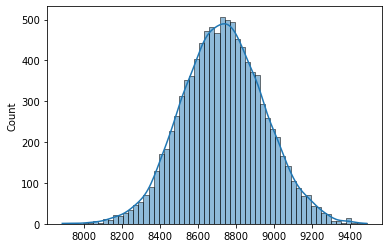

In [76]:
#Confidence Interval for Women
n=500
sample_500_F=[]
for i in range(10000):
    sample_mean=np.random.choice(female, size=n).mean()
    sample_500_F.append(sample_mean)
sns.histplot(sample_500_F,kde=True)

In [78]:
np.mean(sample_500_F), np.std(sample_500_F)

(8732.928955000001, 214.80613090395622)

In [77]:
#95% Confidence Interval for women
CI_500_95_F=np.percentile(sample_500_F,[2.5,97.5])
CI_500_95_F

array([8317.70895, 9165.4083 ])

In [79]:
#90% Confidence Interval for women
CI_500_90_F=np.percentile(sample_500_F,[5,95])
CI_500_90_F

array([8388.3693, 9087.748 ])

In [80]:
#99% Confidence Interval for Women
CI_500_99_F=np.percentile(sample_500_F,[0.5,99.5])
CI_500_99_F

array([8167.84807, 9284.97079])

<AxesSubplot: ylabel='Count'>

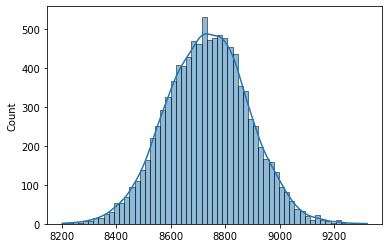

In [81]:
n=1000
sample_1000_F=[]
for i in range(10000):
    sample_mean=np.random.choice(female, size=n).mean()
    sample_1000_F.append(sample_mean)
sns.histplot(sample_1000_F,kde=True)

In [82]:
np.mean(sample_1000_F), np.std(sample_1000_F)

(8734.1665873, 150.17900935177786)

In [83]:
#95% Confidence Interval for Women
CI_1000_95_F=np.percentile(sample_1000_F,[2.5,97.5])
CI_1000_95_F

array([8441.011 , 9027.4102])

In [84]:
#90% Confidence Interval for women
CI_1000_90_F=np.percentile(sample_1000_F,[5,95])
CI_1000_90_F

array([8487.40295, 8981.1754 ])

In [85]:
#99% Confidence Interval for women
CI_1000_99_F=np.percentile(sample_1000_F,[.5,99.5])
CI_1000_99_F

array([8347.72707 , 9132.691685])

<AxesSubplot: ylabel='Count'>

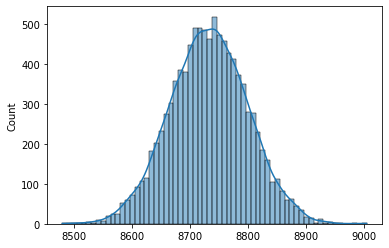

In [86]:
#Confidence Interval for Women
n=5000
sample_5000_F=[]
for i in range(10000):
    sample_mean=np.random.choice(female, size=n).mean()
    sample_5000_F.append(sample_mean)
sns.histplot(sample_5000_F,kde=True)

In [87]:
np.mean(sample_5000_F), np.std(sample_5000_F)

(8733.11520832, 66.69569721122305)

In [88]:
#90% Confidence Interval for women
CI_5000_90_F=np.percentile(sample_5000_F,[5,95])
CI_5000_90_F

array([8623.05487, 8843.04356])

In [89]:
#95% Confidence Interval for Women
CI_5000_95_F=np.percentile(sample_5000_F,[2.5,97.5])
CI_5000_95_F

array([8601.74306 , 8864.786475])

In [90]:
#99% Confidence Interval for women
CI_5000_99_F=np.percentile(sample_5000_F,[.5,99.5])
CI_5000_99_F

array([8562.40006 , 8901.116661])

<AxesSubplot: ylabel='Count'>

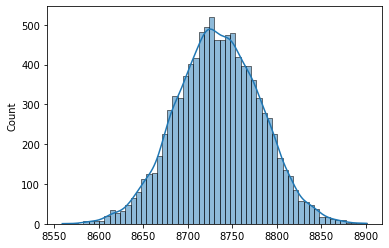

In [91]:
n=10000
sample_10000_F=[]
for i in range(10000):
    sample_mean=np.random.choice(female, size=n).mean()
    sample_10000_F.append(sample_mean)
sns.histplot(sample_10000_F,kde=True)

In [92]:
np.mean(sample_10000_F), np.std(sample_10000_F)

(8734.416556299999, 47.181902607297424)

In [93]:
#95% Confidence Interval for Women
CI_10000_95_F=np.percentile(sample_10000_F,[2.5,97.5])
CI_10000_95_F

array([8641.8504475, 8826.09541  ])

In [94]:
#90% Confidence Interval for women
CI_10000_90_F=np.percentile(sample_10000_F,[5,95])
CI_10000_90_F

array([8656.413475, 8811.236035])

In [95]:
#99% Confidence Interval for women
CI_10000_99_F=np.percentile(sample_10000_F,[.5,99.5])
CI_10000_99_F

array([8612.840201, 8854.806808])

Text(0, 0.5, 'Sample Mean')

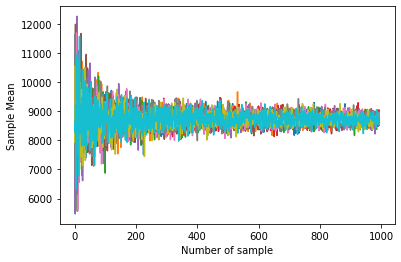

In [96]:
female_mean_trend=[]
for i in range(10):
    for n in range(5,1000):
        sample_mean=df.loc[df["Gender"]=="F","Purchase"].sample(n).mean()
        female_mean_trend.append(sample_mean)
    plt.plot(female_mean_trend)
    female_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

Text(0, 0.5, 'Sample Mean')

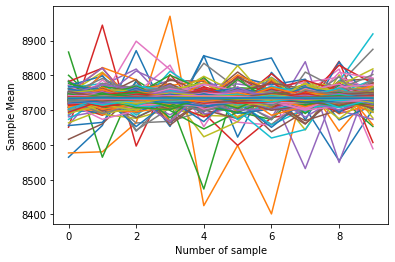

In [97]:
female_mean_trend=[]
for n in range(500,len(df.loc[df["Gender"]=="F","Purchase"]),500):
    for i in range(10):
        sample_mean=df.loc[df["Gender"]=="F","Purchase"].sample(n).mean()
        female_mean_trend.append(sample_mean)
    plt.plot(female_mean_trend)
    female_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

<AxesSubplot: ylabel='Count'>

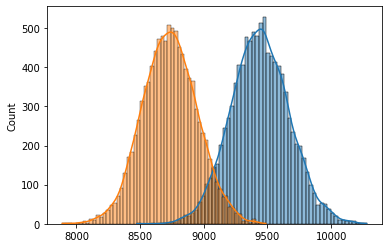

In [98]:
#Overlapping Interval for 500 samples in male and female
sns.histplot(sample_500_M, kde=True)
sns.histplot(sample_500_F,kde=True)

<AxesSubplot: ylabel='Count'>

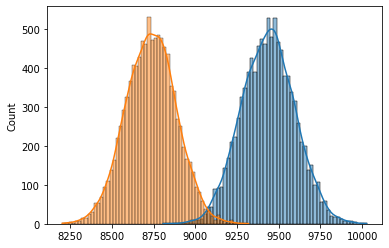

In [99]:
#Overlapping Interval for 1000 samples in male and female
sns.histplot(sample_1000_M, kde=True)
sns.histplot(sample_1000_F,kde=True)

<AxesSubplot: ylabel='Count'>

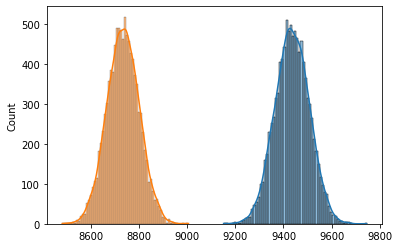

In [100]:
#Overlapping Interval for 5000 samples in male and female
sns.histplot(sample_5000_M, kde=True)
sns.histplot(sample_5000_F,kde=True)

<AxesSubplot: ylabel='Count'>

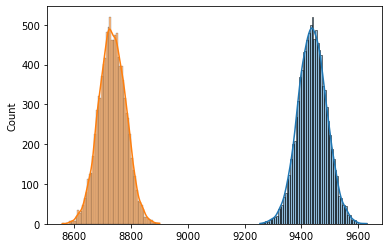

In [101]:
#Overlapping Interval for 10000 samples in male and female
sns.histplot(sample_10000_M, kde=True)
sns.histplot(sample_10000_F,kde=True)

# Confidence Interval for Married and Unmarried

In [102]:
single=df.loc[df["Marital_Status"]==0,"Purchase"]
single.mean(),single.std()

(9265.907618921507, 5027.347858674449)

<AxesSubplot: ylabel='Count'>

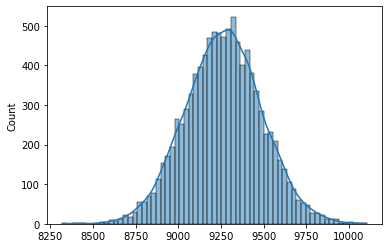

In [103]:
#Confidence Interval for single
n=500
sample_500_s=[]
for i in range(10000):
    sample_mean=np.random.choice(single, size=n).mean()
    sample_500_s.append(sample_mean)
sns.histplot(sample_500_s,kde=True)

In [104]:
np.mean(sample_500_s), np.std(sample_500_s)

(9265.8146218, 223.81411234163087)

In [105]:
#90% Confidence Interval for Single
CI_500_90_s=np.percentile(sample_500_s,[5,95])
CI_500_90_s

array([8900.9551, 9631.8037])

In [106]:
#95% Confidence Interval for Single
CI_500_95_s=np.percentile(sample_500_s,[2.5,97.5])
CI_500_95_s

array([8829.50765, 9708.1515 ])

In [107]:
#99% Confidence Interval for Single
CI_500_99_s=np.percentile(sample_500_s,[.5,99.5])
CI_500_99_s

array([8694.6468 , 9848.37497])

<AxesSubplot: ylabel='Count'>

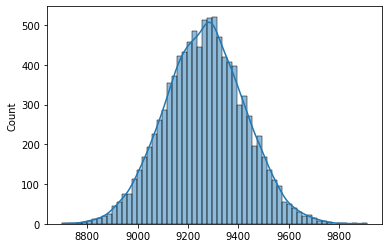

In [108]:
#Confidence Interval for single
n=1000
sample_1000_s=[]
for i in range(10000):
    sample_mean=np.random.choice(single, size=n).mean()
    sample_1000_s.append(sample_mean)
sns.histplot(sample_1000_s,kde=True)

In [109]:
np.mean(sample_1000_s),np.std(sample_1000_s)

(9266.5954808, 157.96122721781137)

In [110]:
#90% Confidence Interval for Single
CI_1000_90_s=np.percentile(sample_1000_s,[5,95])
CI_1000_90_s

array([9006.0929 , 9526.26135])

In [111]:
#95% Confidence Interval for Single
CI_1000_90_s=np.percentile(sample_1000_s,[2.5,97.5])
CI_1000_90_s

array([8956.85455 , 9574.872975])

In [112]:
#99% Confidence Interval for Single
CI_1000_99_s=np.percentile(sample_1000_s,[.5,99.5])
CI_1000_99_s

array([8866.042985, 9676.047775])

<AxesSubplot: ylabel='Count'>

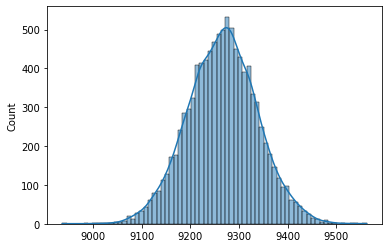

In [113]:
#Confidence Interval for single
n=5000
sample_5000_s=[]
for i in range(10000):
    sample_mean=np.random.choice(single, size=n).mean()
    sample_5000_s.append(sample_mean)
sns.histplot(sample_5000_s,kde=True)

In [114]:
np.mean(sample_5000_s),np.std(sample_5000_s)

(9265.83753606, 71.10998437958521)

In [115]:
#90% Confidence Interval for Single
CI_5000_90_s=np.percentile(sample_5000_s,[5,95])
CI_5000_90_s

array([9148.17447, 9383.25829])

In [116]:
#95% Confidence Interval for Single
CI_5000_95_s=np.percentile(sample_5000_s,[2.5,97.5])
CI_5000_95_s

array([9124.84945, 9408.13903])

In [117]:
#99% Confidence Interval for Single
CI_5000_99_s=np.percentile(sample_5000_s,[.5,99.5])
CI_5000_99_s

array([9084.985293, 9447.918966])

<AxesSubplot: ylabel='Count'>

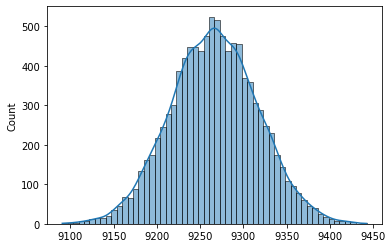

In [118]:
#Confidence Interval for single
n=10000
sample_10000_s=[]
for i in range(10000):
    sample_mean=np.random.choice(single, size=n).mean()
    sample_10000_s.append(sample_mean)
sns.histplot(sample_10000_s,kde=True)

In [119]:
np.mean(sample_10000_s),np.std(sample_10000_s)

(9266.334334469999, 50.20726274429961)

In [120]:
#90% Confidence Interval for Single
CI_10000_90_s=np.percentile(sample_10000_s,[5,95])
CI_10000_90_s

array([9184.16981, 9348.74129])

In [121]:
#95% Confidence Interval for Single
CI_10000_95_s=np.percentile(sample_10000_s,[2.5,97.5])
CI_10000_95_s

array([9168.53881  , 9365.0662775])

In [122]:
#99% Confidence Interval for Single
CI_10000_99_s=np.percentile(sample_10000_s,[.5,99.5])
CI_10000_99_s

array([9135.935729, 9394.822901])

Text(0, 0.5, 'Sample Mean')

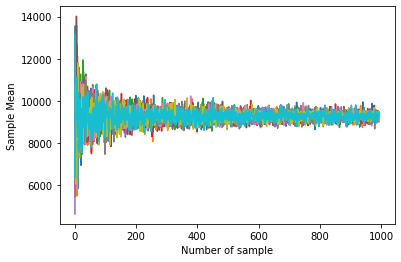

In [123]:
single_mean_trend=[]
for i in range(10):
    for n in range(5,1000):
        sample_mean=df.loc[df["Marital_Status"]==0,"Purchase"].sample(n).mean()
        single_mean_trend.append(sample_mean)
    plt.plot(single_mean_trend)
    single_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

Text(0, 0.5, 'Sample Mean')

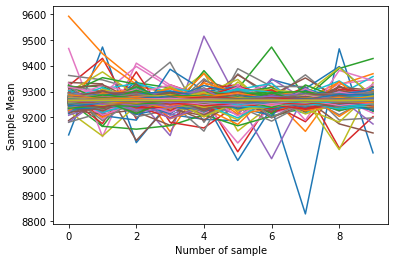

In [124]:
single_mean_trend=[]
for n in range(500,len(df.loc[df["Marital_Status"]==0,"Purchase"]),500):
    for i in range(10):
        sample_mean=df.loc[df["Marital_Status"]==0,"Purchase"].sample(n).mean()
        single_mean_trend.append(sample_mean)
    plt.plot(single_mean_trend)
    single_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

In [125]:
married=df.loc[df["Marital_Status"]==1,"Purchase"]
married.mean(), married.std()

(9261.174574082374, 5016.897377793055)

<AxesSubplot: ylabel='Count'>

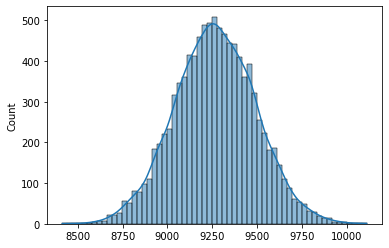

In [126]:
#Confidence Interval for Married
n=500
sample_500_m=[]
for i in range(10000):
    sample_mean=np.random.choice(single, size=n).mean()
    sample_500_m.append(sample_mean)
sns.histplot(sample_500_m,kde=True)

In [127]:
np.mean(sample_500_m),np.std(sample_500_m)

(9266.6626184, 225.381446858183)

In [128]:
#90% Confidence Interval for Married
CI_500_90_m=np.percentile(sample_500_m,[5,95])
CI_500_90_m

array([8896.5079, 9635.5486])

In [129]:
#95% Confidence Interval for Married
CI_500_95_m=np.percentile(sample_500_m,[2.5, 97.5])
CI_500_95_m

array([8818.73565, 9710.27675])

In [130]:
#95% Confidence Interval for Married
CI_500_99_m=np.percentile(sample_500_m,[.5, 99.5])
CI_500_99_m

array([8695.14198, 9858.81989])

<AxesSubplot: ylabel='Count'>

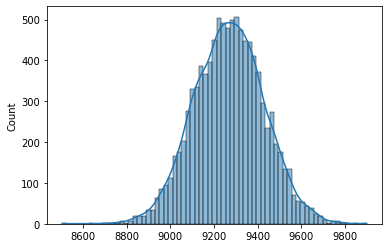

In [131]:
#Confidence Interval for Married
n=1000
sample_1000_m=[]
for i in range(10000):
    sample_mean=np.random.choice(single, size=n).mean()
    sample_1000_m.append(sample_mean)
sns.histplot(sample_1000_m,kde=True)

In [132]:
np.mean(sample_1000_m),np.std(sample_1000_m)

(9268.3468147, 159.34973559140022)

In [133]:
#90% Confidence Interval for Married
CI_1000_90_m=np.percentile(sample_1000_m,[5,95])
CI_1000_90_m

array([9008.4893, 9528.9399])

In [134]:
#95% Confidence Interval for Married
CI_1000_95_m=np.percentile(sample_1000_m,[2.5,97.5])
CI_1000_95_m

array([8959.564425, 9579.31305 ])

In [135]:
#99% Confidence Interval for Married
CI_1000_99_m=np.percentile(sample_1000_m,[.5,99.5])
CI_1000_99_m

array([8853.41177 , 9674.178725])

<AxesSubplot: ylabel='Count'>

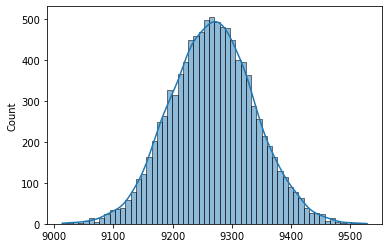

In [136]:
#Confidence Interval for Married
n=5000
sample_5000_m=[]
for i in range(10000):
    sample_mean=np.random.choice(single, size=n).mean()
    sample_5000_m.append(sample_mean)
sns.histplot(sample_5000_m,kde=True)

In [137]:
np.mean(sample_5000_m),np.std(sample_5000_m)

(9267.397319380001, 71.05856089995389)

In [138]:
#90% Confidence Interval for Married
CI_5000_90_m=np.percentile(sample_5000_m,[5,95])
CI_5000_90_m

array([9152.6119 , 9385.91132])

In [139]:
#95% Confidence Interval for Married
CI_5000_95_m=np.percentile(sample_5000_m,[2.5,97.5])
CI_5000_95_m

array([9130.350745, 9408.47536 ])

In [140]:
#99% Confidence Interval for Married
CI_5000_99_m=np.percentile(sample_5000_m,[.5,99.5])
CI_5000_99_m

array([9084.730652, 9452.726131])

<AxesSubplot: ylabel='Count'>

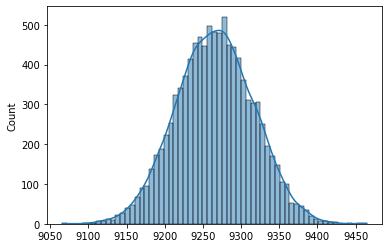

In [141]:
#Confidence Interval for Married
n=10000
sample_10000_m=[]
for i in range(10000):
    sample_mean=np.random.choice(single, size=n).mean()
    sample_10000_m.append(sample_mean)
sns.histplot(sample_10000_m,kde=True)

In [142]:
np.mean(sample_10000_m),np.std(sample_10000_m)

(9265.71635518, 50.304317582443375)

In [143]:
#90% Confidence Interval for Married
CI_10000_90_m=np.percentile(sample_10000_m,[5,95])
CI_10000_90_m

array([9183.67608, 9348.41578])

In [144]:
#95% Confidence Interval for Married
CI_10000_95_m=np.percentile(sample_10000_m,[2.5,97.5])
CI_10000_95_m

array([9167.91404 , 9362.216795])

In [145]:
#99% Confidence Interval for Married
CI_10000_99_m=np.percentile(sample_10000_m,[.5,99.5])
CI_10000_99_m

array([9137.282125, 9390.619529])

<AxesSubplot: ylabel='Count'>

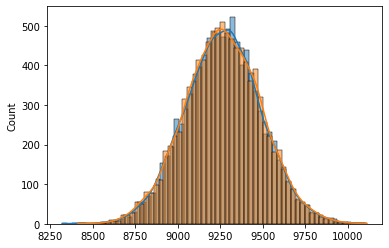

In [146]:
#Overlapping Interval for 500 samples in single and Married
sns.histplot(sample_500_s, kde=True)
sns.histplot(sample_500_m,kde=True)

<AxesSubplot: ylabel='Count'>

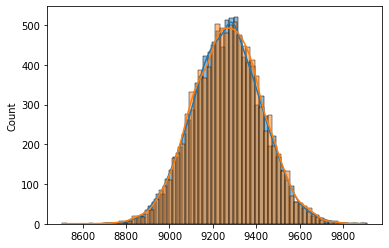

In [147]:
#Overlapping Interval for 1000 samples in single and Married
sns.histplot(sample_1000_s, kde=True)
sns.histplot(sample_1000_m,kde=True)

<AxesSubplot: ylabel='Count'>

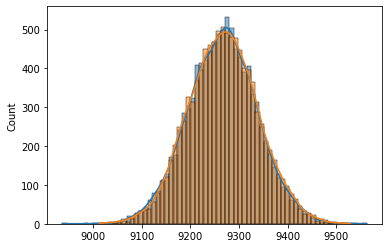

In [148]:
#Overlapping Interval for 5000 samples in single and Married
sns.histplot(sample_5000_s, kde=True)
sns.histplot(sample_5000_m,kde=True)

<AxesSubplot: ylabel='Count'>

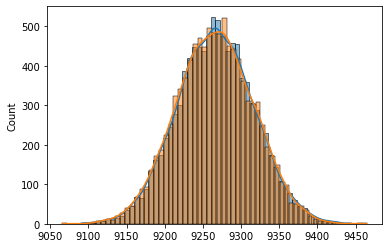

In [149]:
#Overlapping Interval for 10000 samples in single and Married
sns.histplot(sample_10000_s, kde=True)
sns.histplot(sample_10000_m, kde=True)

Text(0, 0.5, 'Sample Mean')

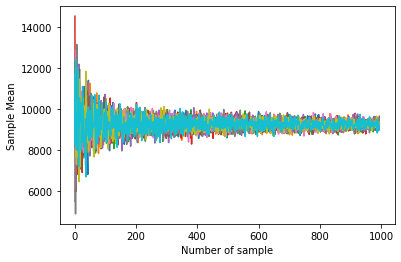

In [150]:
married_mean_trend=[]
for i in range(10):
    for n in range(5,1000):
        sample_mean=df.loc[df["Marital_Status"]==1,"Purchase"].sample(n).mean()
        married_mean_trend.append(sample_mean)
    plt.plot(married_mean_trend)
    married_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

Text(0, 0.5, 'Sample Mean')

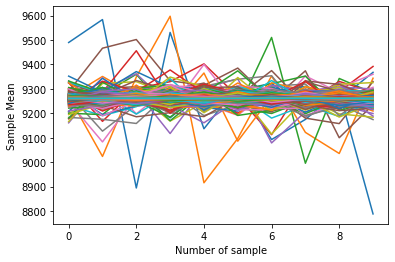

In [151]:
married_mean_trend=[]
for n in range(500,len(df.loc[df["Marital_Status"]==1,"Purchase"]),500):
    for i in range(10):
        sample_mean=df.loc[df["Marital_Status"]==1,"Purchase"].sample(n).mean()
        married_mean_trend.append(sample_mean)
    plt.plot(married_mean_trend)
    married_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

# Confidence intervals for Age

In [152]:
age_0_17=df.loc[df["Age"]=="0-17","Purchase"]
age_0_17.mean(), age_0_17.std()

(8933.464640444974, 5111.11404600277)

<AxesSubplot: ylabel='Count'>

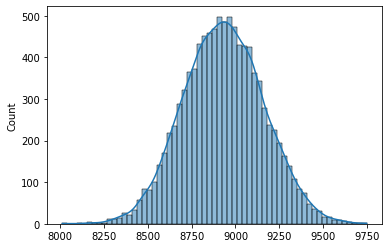

In [153]:
#Confidence Interval for Age 0-17
n=500
sample_500_0_17=[]
for i in range(10000):
    sample_mean=np.random.choice(age_0_17, size=n).mean()
    sample_500_0_17.append(sample_mean)
sns.histplot(sample_500_0_17,kde=True)

In [154]:
np.mean(sample_500_0_17), np.std(sample_500_0_17)

(8931.913497999998, 227.5486159212189)

In [155]:
#90% Confidence Interval for Age 0-17
CI_500_90_0_17=np.percentile(sample_500_0_17,[5,95])
CI_500_90_0_17

array([8565.5678, 9308.9036])

In [156]:
#95% Confidence Interval for Age 0-17
CI_500_95_0_17=np.percentile(sample_500_0_17,[2.5,97.5])
CI_500_95_0_17

array([8489.015 , 9379.0426])

In [157]:
#99% Confidence Interval for Age 0-17
CI_500_99_0_17=np.percentile(sample_500_0_17,[0.5,99.5])
CI_500_99_0_17

array([8355.10567, 9520.45703])

<AxesSubplot: ylabel='Count'>

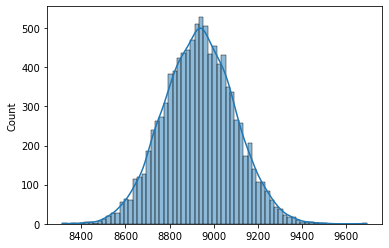

In [158]:
#Confidence Interval for Age 0-17
n=1000
sample_1000_0_17=[]
for i in range(10000):
    sample_mean=np.random.choice(age_0_17, size=n).mean()
    sample_1000_0_17.append(sample_mean)
sns.histplot(sample_1000_0_17,kde=True)

In [159]:
np.mean(sample_1000_0_17), np.std(sample_1000_0_17)

(8933.2240803, 160.47172729911287)

In [160]:
#90% Confidence Interval for Age 0-17
CI_1000_90_0_17=np.percentile(sample_1000_0_17,[5,95])
CI_1000_90_0_17

array([8668.9959 , 9199.83045])

In [161]:
#95% Confidence Interval for Age 0-17
CI_1000_95_0_17=np.percentile(sample_1000_0_17,[2.5,97.5])
CI_1000_95_0_17

array([8622.022275, 9248.19915 ])

In [162]:
#99% Confidence Interval for Age 0-17
CI_1000_99_0_17=np.percentile(sample_1000_0_17,[0.5,99.5])
CI_1000_99_0_17

array([8530.16027, 9346.73111])

<AxesSubplot: ylabel='Count'>

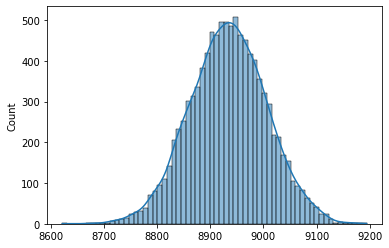

In [163]:
#Confidence Interval for Age 0-17
n=5000
sample_5000_0_17=[]
for i in range(10000):
    sample_mean=np.random.choice(age_0_17, size=n).mean()
    sample_5000_0_17.append(sample_mean)
sns.histplot(sample_5000_0_17,kde=True)

In [164]:
np.mean(sample_5000_0_17), np.std(sample_5000_0_17)

(8933.72805978, 72.07273610615026)

In [165]:
#90% Confidence Interval for Age 0-17
CI_5000_90_0_17=np.percentile(sample_5000_0_17,[5,95])
CI_5000_90_0_17

array([8815.19332, 9052.30912])

In [166]:
#90% Confidence Interval for Age 0-17
CI_5000_95_0_17=np.percentile(sample_5000_0_17,[2.5,97.5])
CI_5000_95_0_17

array([8791.666285, 9075.24195 ])

In [167]:
#99% Confidence Interval for Age 0-17
CI_5000_99_0_17=np.percentile(sample_5000_0_17,[0.5,99.5])
CI_5000_99_0_17

array([8745.52394 , 9114.631535])

<AxesSubplot: ylabel='Count'>

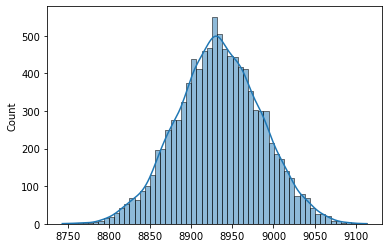

In [168]:
#Confidence Interval for Age 0-17
n=10000
sample_10000_0_17=[]
for i in range(10000):
    sample_mean=np.random.choice(age_0_17, size=n).mean()
    sample_10000_0_17.append(sample_mean)
sns.histplot(sample_10000_0_17,kde=True)

In [169]:
np.mean(sample_10000_0_17), np.std(sample_10000_0_17)

(8933.666458269998, 51.2056803825347)

In [170]:
#90% Confidence Interval for Age 0-17
CI_10000_90_0_17=np.percentile(sample_10000_0_17,[5,95])
CI_10000_90_0_17

array([8849.68559, 9018.17305])

In [171]:
#95% Confidence Interval for Age 0-17
CI_10000_95_0_17=np.percentile(sample_10000_0_17,[2.5,97.5])
CI_10000_95_0_17

array([8831.08997 , 9035.023655])

In [172]:
#99% Confidence Interval for Age 0-17
CI_10000_99_0_17=np.percentile(sample_10000_0_17,[.5,99.5])
CI_10000_99_0_17

array([8804.1177935, 9061.6855155])

Text(0, 0.5, 'Sample Mean')

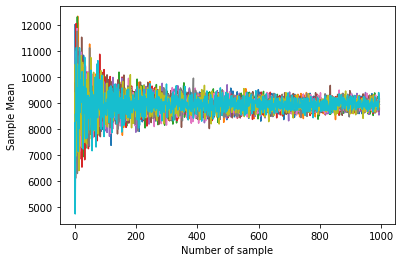

In [173]:
age_0_17_mean_trend=[]
for i in range(10):
    for n in range(5,1000):
        sample_mean=df.loc[df["Age"]=="0-17","Purchase"].sample(n).mean()
        age_0_17_mean_trend.append(sample_mean)
    plt.plot(age_0_17_mean_trend)
    age_0_17_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

Text(0, 0.5, 'Sample Mean')

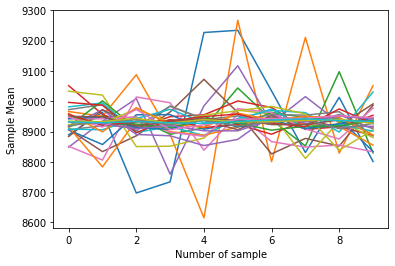

In [293]:
age_0_17_mean_trend=[]
for n in range(500, len(df.loc[df["Age"]=="0-17","Purchase"]),500):
    for i in range(10):
        sample_mean=df.loc[df["Age"]=="0-17","Purchase"].sample(n).mean()
        age_0_17_mean_trend.append(sample_mean)
    plt.plot(age_0_17_mean_trend)
    age_0_17_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

In [175]:
age_18_25=df.loc[df["Age"]=="18-25","Purchase"]
age_18_25.mean(), age_18_25.std()

(9169.663606261289, 5034.32199717658)

<AxesSubplot: ylabel='Count'>

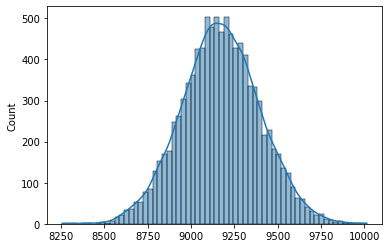

In [176]:
#Confidence Interval for Age 18-25
n=500
sample_500_18_25=[]
for i in range(10000):
    sample_mean=np.random.choice(age_18_25, size=n).mean()
    sample_500_18_25.append(sample_mean)
sns.histplot(sample_500_18_25,kde=True)

In [177]:
np.mean(sample_500_18_25), np.std(sample_500_18_25)

(9171.067016800002, 225.21158354733825)

In [178]:
#90% Confidence Interval for Age 18-25
CI_500_90_18_25=np.percentile(sample_500_18_25,[5,95])
CI_500_90_18_25

array([8801.5877, 9545.8687])

In [179]:
#95% Confidence Interval for Age 18-25
CI_500_95_18_25=np.percentile(sample_500_18_25,[2.5,97.5])
CI_500_95_18_25

array([8727.4892, 9615.9811])

In [180]:
#99% Confidence Interval for Age 18-25
CI_500_99_18_25=np.percentile(sample_500_18_25,[0.5,99.5])
CI_500_99_18_25

array([8603.48338, 9757.95085])

<AxesSubplot: ylabel='Count'>

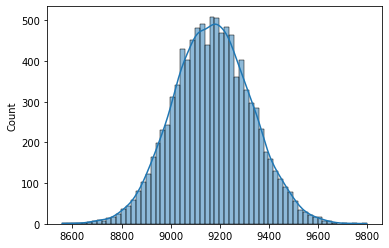

In [181]:
#Confidence Interval for Age 18-25
n=1000
sample_1000_18_25=[]
for i in range(10000):
    sample_mean=np.random.choice(age_18_25, size=n).mean()
    sample_1000_18_25.append(sample_mean)
sns.histplot(sample_1000_18_25,kde=True)

In [182]:
np.mean(sample_1000_18_25), np.std(sample_1000_18_25)

(9169.645156, 158.28505424216357)

In [183]:
#90% Confidence Interval for Age 18-25
CI_1000_90_18_25=np.percentile(sample_1000_18_25,[5,95])
CI_1000_90_18_25

array([8914.79675, 9433.3413 ])

In [184]:
#95% Confidence Interval for Age 18-25
CI_1000_95_18_25=np.percentile(sample_1000_18_25,[2.5,97.5])
CI_1000_95_18_25

array([8864.115775, 9483.95805 ])

In [185]:
#99% Confidence Interval for Age 18-25
CI_1000_99_18_25=np.percentile(sample_1000_18_25,[0.5,99.5])
CI_1000_99_18_25

array([8761.103205, 9579.595535])

<AxesSubplot: ylabel='Count'>

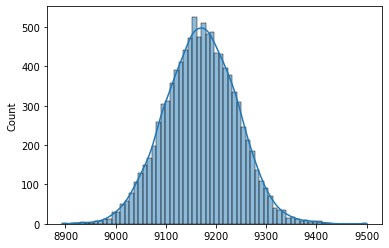

In [186]:
#Confidence Interval for Age 18-25
n=5000
sample_5000_18_25=[]
for i in range(10000):
    sample_mean=np.random.choice(age_18_25, size=n).mean()
    sample_5000_18_25.append(sample_mean)
sns.histplot(sample_5000_18_25,kde=True)

In [187]:
np.mean(sample_5000_18_25), np.std(sample_5000_18_25)

(9169.83003968, 70.73324821015667)

In [188]:
#90% Confidence Interval for Age 18-25
CI_5000_90_18_25=np.percentile(sample_5000_18_25,[5,95])
CI_5000_90_18_25

array([9052.2707 , 9283.67839])

In [189]:
#95% Confidence Interval for Age 18-25
CI_5000_95_18_25=np.percentile(sample_5000_18_25,[2.5,97.5])
CI_5000_95_18_25

array([9031.81542 , 9306.333665])

In [190]:
#99% Confidence Interval for Age 18-25
CI_5000_99_18_25=np.percentile(sample_5000_18_25,[0.5,99.5])
CI_5000_99_18_25

array([8992.014857, 9356.766905])

<AxesSubplot: ylabel='Count'>

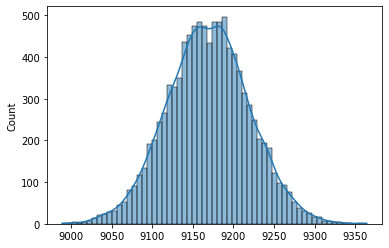

In [191]:
#Confidence Interval for Age 18-25
n=10000
sample_10000_18_25=[]
for i in range(10000):
    sample_mean=np.random.choice(age_18_25, size=n).mean()
    sample_10000_18_25.append(sample_mean)
sns.histplot(sample_10000_18_25,kde=True)

In [192]:
np.mean(sample_10000_18_25), np.std(sample_10000_18_25)

(9169.08703338, 50.229826413554534)

In [193]:
#90% Confidence Interval for Age 18-25
CI_10000_90_18_25=np.percentile(sample_10000_18_25,[5,95])
CI_10000_90_18_25

array([9086.57752, 9251.74309])

In [194]:
#95% Confidence Interval for Age 18-25
CI_10000_95_18_25=np.percentile(sample_10000_18_25,[2.5,97.5])
CI_10000_95_18_25

array([9070.532235, 9268.32102 ])

In [195]:
#99% Confidence Interval for Age 18-25
CI_10000_99_18_25=np.percentile(sample_10000_18_25,[0.5,99.5])
CI_10000_99_18_25

array([9037.7731965, 9300.018106 ])

Text(0, 0.5, 'Sample Mean')

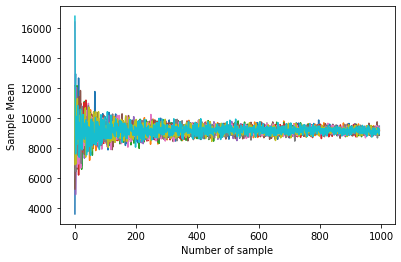

In [196]:
age_18_25_mean_trend=[]
for i in range(10):
    for n in range(5,1000):
        sample_mean=df.loc[df["Age"]=="18-25","Purchase"].sample(n).mean()
        age_18_25_mean_trend.append(sample_mean)
    plt.plot(age_18_25_mean_trend)
    age_18_25_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

Text(0, 0.5, 'Sample Mean')

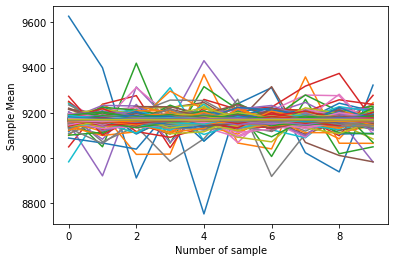

In [292]:
age_18_25_mean_trend=[]
for n in range(500, len(df.loc[df["Age"]=="18-25","Purchase"]),500):
    for i in range(10):
        sample_mean=df.loc[df["Age"]=="18-25","Purchase"].sample(n).mean()
        age_18_25_mean_trend.append(sample_mean)
    plt.plot(age_18_25_mean_trend)
    age_18_25_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

In [198]:
age_26_35=df.loc[df["Age"]=="26-35","Purchase"]
age_26_35.mean(), age_26_35.std()

(9252.690632869888, 5010.527303002956)

<AxesSubplot: ylabel='Count'>

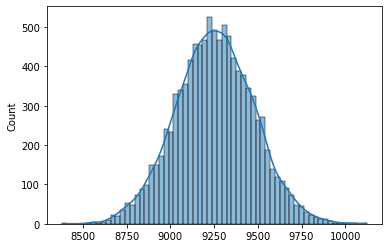

In [199]:
#Confidence Interval for Age 26-35
n=500
sample_500_26_35=[]
for i in range(10000):
    sample_mean=np.random.choice(age_26_35, size=n).mean()
    sample_500_26_35.append(sample_mean)
sns.histplot(sample_500_26_35,kde=True)

In [200]:
np.mean(sample_500_26_35), np.std(sample_500_26_35)

(9253.4089574, 221.8302356179783)

In [201]:
#90% Confidence Interval for Age 26-35
CI_500_90_26_35=np.percentile(sample_500_26_35,[5,95])
CI_500_90_26_35

array([8886.4294, 9617.888 ])

In [202]:
#95% Confidence Interval for Age 26-35
CI_500_95_26_35=np.percentile(sample_500_26_35,[2.5,97.5])
CI_500_95_26_35

array([8813.608 , 9690.4262])

In [203]:
#99% Confidence Interval for Age 26-35
CI_500_99_26_35=np.percentile(sample_500_26_35,[.5,99.5])
CI_500_99_26_35

array([8691.2904 , 9829.01609])

<AxesSubplot: ylabel='Count'>

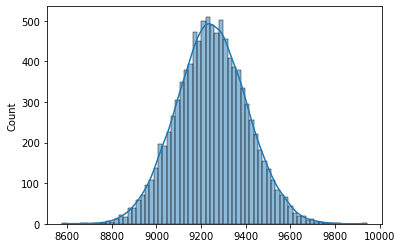

In [204]:
#Confidence Interval for Age 26-35
n=1000
sample_1000_26_35=[]
for i in range(10000):
    sample_mean=np.random.choice(age_26_35, size=n).mean()
    sample_1000_26_35.append(sample_mean)
sns.histplot(sample_1000_26_35,kde=True)

In [205]:
np.mean(sample_1000_26_35), np.std(sample_1000_26_35)

(9247.386585, 157.21120209267397)

In [206]:
#90% Confidence Interval for Age 26-35
CI_1000_90_26_35=np.percentile(sample_1000_26_35,[5,95])
CI_1000_90_26_35

array([8989.52645, 9507.88795])

In [207]:
#95% Confidence Interval for Age 26-35
CI_1000_95_26_35=np.percentile(sample_1000_26_35,[2.5,97.5])
CI_1000_95_26_35

array([8940.536075, 9559.7212  ])

In [208]:
#99% Confidence Interval for Age 26-35
CI_1000_99_26_35=np.percentile(sample_1000_26_35,[.5,99.5])
CI_1000_99_26_35

array([8849.920275, 9650.893925])

<AxesSubplot: ylabel='Count'>

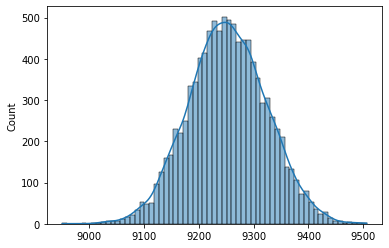

In [209]:
#Confidence Interval for Age 26-35
n=5000
sample_5000_26_35=[]
for i in range(10000):
    sample_mean=np.random.choice(age_26_35, size=n).mean()
    sample_5000_26_35.append(sample_mean)
sns.histplot(sample_5000_26_35,kde=True)

In [210]:
np.mean(sample_5000_26_35), np.std(sample_5000_26_35)

(9252.50440784, 70.94276386180474)

In [211]:
#90% Confidence Interval for Age 26-35
CI_5000_90_26_35=np.percentile(sample_5000_26_35,[5,95])
CI_5000_90_26_35

array([9136.8076 , 9369.65752])

In [212]:
#95% Confidence Interval for Age 26-35
CI_5000_95_26_35=np.percentile(sample_5000_26_35,[2.5,97.5])
CI_5000_95_26_35

array([9115.6345  , 9392.883345])

In [213]:
#99% Confidence Interval for Age 26-35
CI_5000_99_26_35=np.percentile(sample_5000_26_35,[0.5,99.5])
CI_5000_99_26_35

array([9072.126631, 9432.032633])

<AxesSubplot: ylabel='Count'>

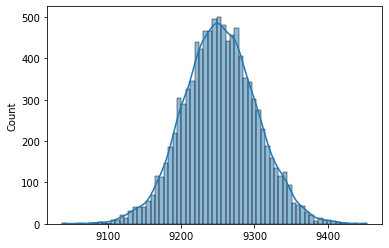

In [214]:
#Confidence Interval for Age 26-35
n=10000
sample_10000_26_35=[]
for i in range(10000):
    sample_mean=np.random.choice(age_26_35, size=n).mean()
    sample_10000_26_35.append(sample_mean)
sns.histplot(sample_10000_26_35,kde=True)

In [215]:
np.mean(sample_10000_26_35), np.std(sample_10000_26_35)

(9252.83178524, 49.812039554866075)

In [216]:
#90% Confidence Interval for Age 26-35
CI_10000_90_26_35=np.percentile(sample_10000_26_35,[5,95])
CI_10000_90_26_35

array([9172.08723, 9336.56937])

In [217]:
#95% Confidence Interval for Age 26-35
CI_10000_95_26_35=np.percentile(sample_10000_26_35,[2.5,97.5])
CI_10000_95_26_35

array([9155.2492425, 9350.2756575])

In [218]:
#99% Confidence Interval for Age 26-35
CI_10000_99_26_35=np.percentile(sample_10000_26_35,[0.5,99.5])
CI_10000_99_26_35

array([9119.5902645, 9382.790058 ])

Text(0, 0.5, 'Sample Mean')

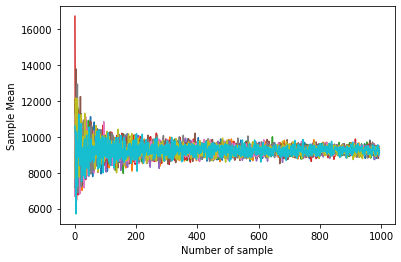

In [219]:
age_26_35_mean_trend=[]
for i in range(10):
    for n in range(5,1000):
        sample_mean=df.loc[df["Age"]=="26-35","Purchase"].sample(n).mean()
        age_26_35_mean_trend.append(sample_mean)
    plt.plot(age_26_35_mean_trend)
    age_26_35_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

Text(0, 0.5, 'Sample Mean')

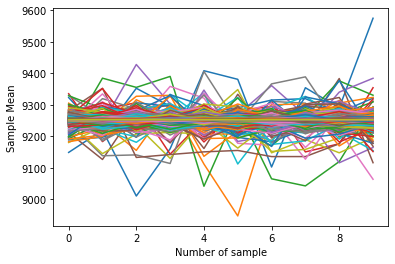

In [291]:
age_26_35_mean_trend=[]
for n in range(500, len(df.loc[df["Age"]=="26-35","Purchase"]),500):
    for i in range(10):
        sample_mean=df.loc[df["Age"]=="26-35","Purchase"].sample(n).mean()
        age_26_35_mean_trend.append(sample_mean)
    plt.plot(age_26_35_mean_trend)
    age_26_35_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

In [221]:
age_36_45=df.loc[df["Age"]=="36-45","Purchase"]
age_36_45.mean(), age_36_45.std()

(9331.350694917874, 5022.923879204662)

<AxesSubplot: ylabel='Count'>

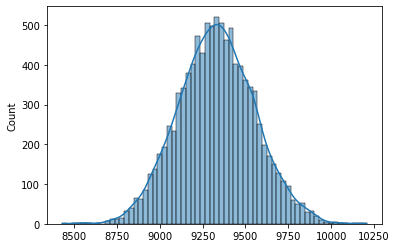

In [222]:
#Confidence Interval for Age 36-45
n=500
sample_500_36_45=[]
for i in range(10000):
    sample_mean=np.random.choice(age_36_45, size=n).mean()
    sample_500_36_45.append(sample_mean)
sns.histplot(sample_500_36_45,kde=True)

In [223]:
np.mean(sample_500_36_45), np.std(sample_500_36_45)

(9330.386765199999, 222.06651943321683)

In [224]:
#90% Confidence Interval for Age 36-45
CI_500_90_36_45=np.percentile(sample_500_36_45,[5,95])
CI_500_90_36_45

array([8966.3825, 9700.4549])

In [225]:
#95% Confidence Interval for Age 36-45
CI_500_95_36_45=np.percentile(sample_500_36_45,[2.5,97.5])
CI_500_95_36_45

array([8901.15505, 9772.52355])

In [226]:
#99% Confidence Interval for Age 36-45
CI_500_99_36_45=np.percentile(sample_500_36_45,[0.5,99.5])
CI_500_99_36_45

array([8778.33044, 9900.21408])

<AxesSubplot: ylabel='Count'>

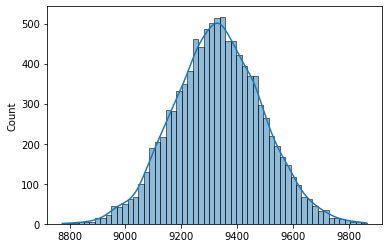

In [227]:
#Confidence Interval for Age 36-45
n=1000
sample_1000_36_45=[]
for i in range(10000):
    sample_mean=np.random.choice(age_36_45, size=n).mean()
    sample_1000_36_45.append(sample_mean)
sns.histplot(sample_1000_36_45,kde=True)

In [228]:
np.mean(sample_1000_36_45), np.std(sample_1000_36_45)

(9331.7158052, 158.25122602250275)

In [229]:
#90% Confidence Interval for Age 36-45
CI_1000_90_36_45=np.percentile(sample_1000_36_45,[5,95])
CI_1000_90_36_45

array([9074.99085, 9593.926  ])

In [230]:
#95% Confidence Interval for Age 36-45
CI_1000_95_36_45=np.percentile(sample_1000_36_45,[2.5,97.5])
CI_1000_95_36_45

array([9020.6562  , 9647.006875])

In [231]:
#99% Confidence Interval for Age 36-45
CI_1000_99_36_45=np.percentile(sample_1000_36_45,[0.5,99.5])
CI_1000_99_36_45

array([8933.03513, 9740.26803])

<AxesSubplot: ylabel='Count'>

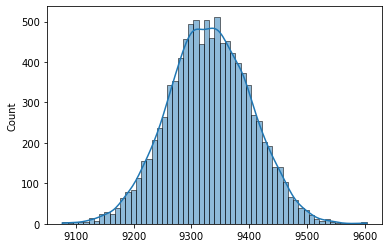

In [232]:
#Confidence Interval for Age 36-45
n=5000
sample_5000_36_45=[]
for i in range(10000):
    sample_mean=np.random.choice(age_36_45, size=n).mean()
    sample_5000_36_45.append(sample_mean)
sns.histplot(sample_5000_36_45,kde=True)

In [233]:
np.mean(sample_5000_36_45), np.std(sample_5000_36_45)

(9330.948327799999, 71.6283983332825)

In [234]:
#90% Confidence Interval for Age 36-45
CI_5000_90_36_45=np.percentile(sample_5000_36_45,[5,95])
CI_5000_90_36_45

array([9213.6761 , 9449.60152])

In [235]:
#95% Confidence Interval for Age 36-45
CI_5000_95_36_45=np.percentile(sample_5000_36_45,[2.5,97.5])
CI_5000_95_36_45

array([9190.238685, 9469.063635])

In [236]:
#99% Confidence Interval for Age 36-45
CI_5000_99_36_45=np.percentile(sample_5000_36_45,[0.5,99.5])
CI_5000_99_36_45

array([9146.240289, 9509.918343])

<AxesSubplot: ylabel='Count'>

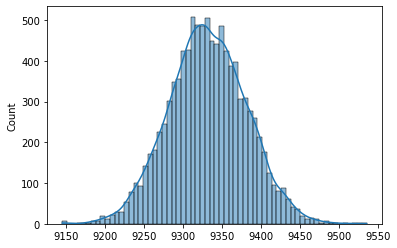

In [237]:
#Confidence Interval for Age 36-45
n=10000
sample_10000_36_45=[]
for i in range(10000):
    sample_mean=np.random.choice(age_36_45, size=n).mean()
    sample_10000_36_45.append(sample_mean)
sns.histplot(sample_10000_36_45,kde=True)

In [238]:
np.mean(sample_10000_36_45), np.std(sample_10000_36_45)

(9331.77035255, 49.453880963332495)

In [239]:
#90% Confidence Interval for Age 36-45
CI_10000_90_36_45=np.percentile(sample_10000_36_45,[5,95])
CI_10000_90_36_45

array([9250.400525, 9412.636315])

In [240]:
#95% Confidence Interval for Age 36-45
CI_10000_95_36_45=np.percentile(sample_10000_36_45,[2.5,97.5])
CI_10000_95_36_45

array([9235.796675, 9429.070715])

In [241]:
#99% Confidence Interval for Age 36-45
CI_10000_99_36_45=np.percentile(sample_10000_36_45,[0.5,99.5])
CI_10000_99_36_45

array([9205.0737   , 9457.7369375])

Text(0, 0.5, 'Sample Mean')

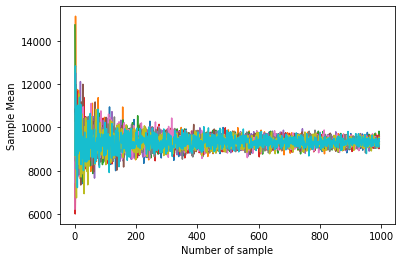

In [242]:
age_36_45_mean_trend=[]
for i in range(10):
    for n in range(5,1000):
        sample_mean=df.loc[df["Age"]=="36-45","Purchase"].sample(n).mean()
        age_36_45_mean_trend.append(sample_mean)
    plt.plot(age_36_45_mean_trend)
    age_36_45_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

Text(0, 0.5, 'Sample Mean')

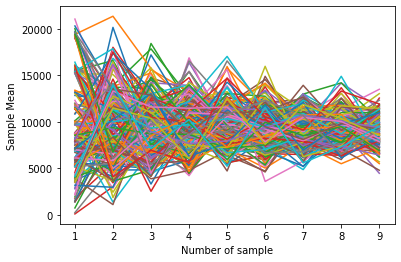

In [290]:
age_36_45_mean_trend=[]
for i in range(500, len(df.loc[df["Age"]=="36-45","Purchase"]),500):
    for n in range(10):
        sample_mean=df.loc[df["Age"]=="36-45","Purchase"].sample(n).mean()
        age_36_45_mean_trend.append(sample_mean)
    plt.plot(age_36_45_mean_trend)
    age_36_45_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

In [244]:
age_46_50=df.loc[df["Age"]=="46-50","Purchase"]
age_46_50.mean(), age_46_50.std()

(9208.625697468327, 4967.216367142941)

<AxesSubplot: ylabel='Count'>

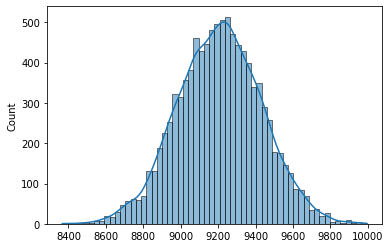

In [245]:
#Confidence Interval for Age 46-50
n=500
sample_500_46_50=[]
for i in range(10000):
    sample_mean=np.random.choice(age_46_50, size=n).mean()
    sample_500_46_50.append(sample_mean)
sns.histplot(sample_500_46_50,kde=True)

In [246]:
np.mean(sample_500_46_50), np.std(sample_500_46_50)

(9207.1222242, 223.31729310876517)

In [247]:
#90% Confidence Interval for Age 46-50
CI_500_90_46_50=np.percentile(sample_500_46_50,[5,95])
CI_500_90_46_50

array([8840.8718, 9575.5661])

In [248]:
#95% Confidence Interval for Age 46-50
CI_500_95_46_50=np.percentile(sample_500_46_50,[2.5,97.5])
CI_500_95_46_50

array([8759.28485, 9643.59735])

In [249]:
#99% Confidence Interval for Age 46-50
CI_500_99_46_50=np.percentile(sample_500_46_50,[0.5,99.5])
CI_500_99_46_50

array([8632.59628, 9777.5826 ])

<AxesSubplot: ylabel='Count'>

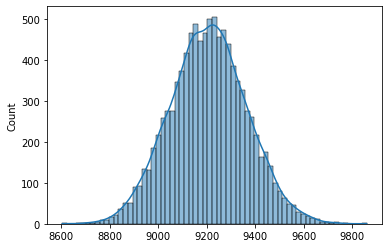

In [250]:
#Confidence Interval for Age 46-50
n=1000
sample_1000_46_50=[]
for i in range(10000):
    sample_mean=np.random.choice(age_46_50, size=n).mean()
    sample_1000_46_50.append(sample_mean)
sns.histplot(sample_1000_46_50,kde=True)

In [251]:
np.mean(sample_1000_46_50), np.std(sample_1000_46_50)

(9207.2635926, 157.1796146772336)

In [252]:
#90% Confidence Interval for Age 46-50
CI_1000_90_46_50=np.percentile(sample_1000_46_50,[5,95])
CI_1000_90_46_50

array([8947.8987 , 9466.16255])

In [253]:
#95% Confidence Interval for Age 46-50
CI_1000_95_46_50=np.percentile(sample_1000_46_50,[2.5,97.5])
CI_1000_95_46_50

array([8902.357325, 9517.76115 ])

In [254]:
#99% Confidence Interval for Age 46-50
CI_1000_99_46_50=np.percentile(sample_1000_46_50,[0.5,99.5])
CI_1000_99_46_50

array([8817.625405, 9619.620765])

<AxesSubplot: ylabel='Count'>

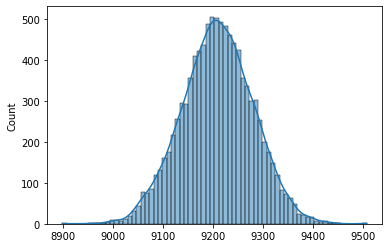

In [255]:
#Confidence Interval for Age 46-50
n=5000
sample_5000_46_50=[]
for i in range(10000):
    sample_mean=np.random.choice(age_46_50, size=n).mean()
    sample_5000_46_50.append(sample_mean)
sns.histplot(sample_5000_46_50,kde=True)

In [256]:
np.mean(sample_5000_46_50), np.std(sample_5000_46_50)

(9208.636802420002, 70.74155162469994)

In [257]:
#90% Confidence Interval for Age 46-50
CI_5000_90_46_50=np.percentile(sample_5000_46_50,[5,95])
CI_5000_90_46_50

array([9089.98683, 9323.7154 ])

In [258]:
#95% Confidence Interval for Age 46-50
CI_5000_95_46_50=np.percentile(sample_5000_46_50,[2.5,97.5])
CI_5000_95_46_50

array([9066.69647 , 9346.054055])

In [259]:
#99% Confidence Interval for Age 46-50
CI_5000_99_46_50=np.percentile(sample_5000_46_50,[0.5,99.5])
CI_5000_99_46_50

array([9030.720844, 9391.067848])

<AxesSubplot: ylabel='Count'>

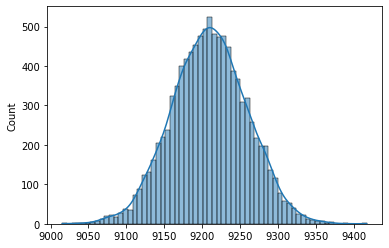

In [260]:
#Confidence Interval for Age 46-50
n=10000
sample_10000_46_50=[]
for i in range(10000):
    sample_mean=np.random.choice(age_46_50, size=n).mean()
    sample_10000_46_50.append(sample_mean)
sns.histplot(sample_10000_46_50,kde=True)

In [261]:
np.mean(sample_10000_46_50), np.std(sample_10000_46_50)

(9209.47624131, 49.39280028109912)

In [262]:
#90% Confidence Interval for Age 46-50
CI_10000_90_46_50=np.percentile(sample_10000_46_50,[5,95])
CI_10000_90_46_50

array([9128.138695, 9290.231125])

In [263]:
#95% Confidence Interval for Age 46-50
CI_10000_95_46_50=np.percentile(sample_10000_46_50,[2.5,97.5])
CI_10000_95_46_50

array([9113.51029, 9304.52021])

In [264]:
#99% Confidence Interval for Age 46-50
CI_10000_99_46_50=np.percentile(sample_10000_46_50,[0.5,99.5])
CI_10000_99_46_50

array([9077.442385, 9334.75923 ])

Text(0, 0.5, 'Sample Mean')

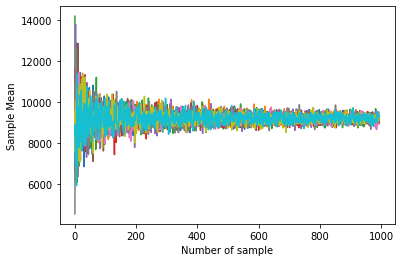

In [265]:
age_46_50_mean_trend=[]
for i in range(10):
    for n in range(5,1000):
        sample_mean=df.loc[df["Age"]=="46-50","Purchase"].sample(n).mean()
        age_46_50_mean_trend.append(sample_mean)
    plt.plot(age_46_50_mean_trend)
    age_46_50_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

Text(0, 0.5, 'Sample Mean')

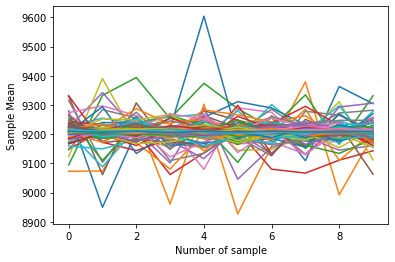

In [289]:
age_46_50_mean_trend=[]
for n in range(500, len(df.loc[df["Age"]=="46-50","Purchase"]),500):
    for i in range(10):
        sample_mean=df.loc[df["Age"]=="46-50","Purchase"].sample(n).mean()
        age_46_50_mean_trend.append(sample_mean)
    plt.plot(age_46_50_mean_trend)
    age_46_50_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

In [267]:
age_51_55=df.loc[df["Age"]=="51-55","Purchase"]
age_51_55.mean(), age_51_55.std()

(9534.808030960236, 5087.368079602135)

<AxesSubplot: ylabel='Count'>

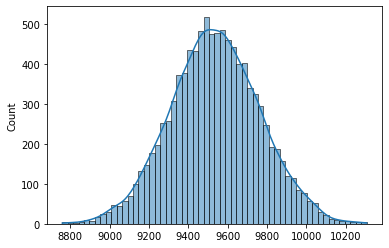

In [268]:
#Confidence Interval for Age 51-55
n=500
sample_500_51_55=[]
for i in range(10000):
    sample_mean=np.random.choice(age_51_55, size=n).mean()
    sample_500_51_55.append(sample_mean)
sns.histplot(sample_500_51_55,kde=True)

In [269]:
np.mean(sample_500_51_55), np.std(sample_500_51_55)

(9536.041769000001, 226.7231574251608)

In [270]:
#90% Confidence Interval for Age 51-55
CI_500_90_51_55=np.percentile(sample_500_51_55,[5,95])
CI_500_90_51_55

array([9163.574, 9916.181])

In [271]:
#95% Confidence Interval for Age 51-55
CI_500_95_51_55=np.percentile(sample_500_51_55,[2.5,97.5])
CI_500_95_51_55

array([9090.2185 , 9985.50915])

In [272]:
#99% Confidence Interval for Age 51-55
CI_500_99_51_55=np.percentile(sample_500_51_55,[0.5,99.5])
CI_500_99_51_55

array([ 8957.03625, 10109.73024])

<AxesSubplot: ylabel='Count'>

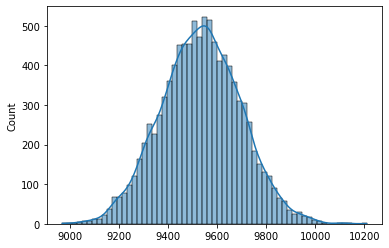

In [273]:
#Confidence Interval for Age 51-55
n=1000
sample_1000_51_55=[]
for i in range(10000):
    sample_mean=np.random.choice(age_51_55, size=n).mean()
    sample_1000_51_55.append(sample_mean)
sns.histplot(sample_1000_51_55,kde=True)

In [274]:
np.mean(sample_1000_51_55), np.std(sample_1000_51_55)

(9534.605667200001, 161.738326332623)

In [275]:
#90% Confidence Interval for Age 51-55
CI_1000_90_51_55=np.percentile(sample_1000_51_55,[5,95])
CI_1000_90_51_55

array([9269.7396, 9800.7819])

In [276]:
#95% Confidence Interval for Age 51-55
CI_1000_95_51_55=np.percentile(sample_1000_51_55,[2.5,97.5])
CI_1000_95_51_55

array([9216.16685, 9852.99015])

In [277]:
#99% Confidence Interval for Age 51-55
CI_1000_99_51_55=np.percentile(sample_1000_51_55,[0.5,99.5])
CI_1000_99_51_55

array([9134.58691, 9958.1098 ])

<AxesSubplot: ylabel='Count'>

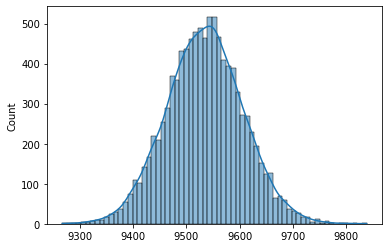

In [278]:
#Confidence Interval for Age 51-55
n=5000
sample_5000_51_55=[]
for i in range(10000):
    sample_mean=np.random.choice(age_51_55, size=n).mean()
    sample_5000_51_55.append(sample_mean)
sns.histplot(sample_5000_51_55,kde=True)

In [279]:
np.mean(sample_5000_51_55), np.std(sample_5000_51_55)

(9534.80569254, 71.3794131317247)

In [280]:
#90% Confidence Interval for Age 51-55
CI_5000_90_51_55=np.percentile(sample_5000_51_55,[5,95])
CI_5000_90_51_55

array([9417.63168, 9653.08866])

In [281]:
#95% Confidence Interval for Age 51-55
CI_5000_95_51_55=np.percentile(sample_5000_51_55,[2.5,97.5])
CI_5000_95_51_55

array([9396.29096, 9677.29929])

In [282]:
#99% Confidence Interval for Age 51-55
CI_5000_99_51_55=np.percentile(sample_5000_51_55,[0.5,99.5])
CI_5000_99_51_55

array([9350.976661, 9723.607462])

<AxesSubplot: ylabel='Count'>

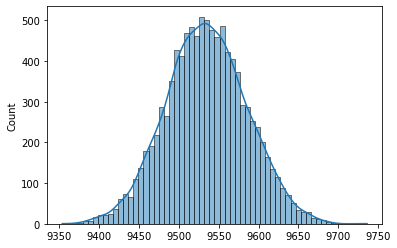

In [283]:
#Confidence Interval for Age 51-55
n=10000
sample_10000_51_55=[]
for i in range(10000):
    sample_mean=np.random.choice(age_51_55, size=n).mean()
    sample_10000_51_55.append(sample_mean)
sns.histplot(sample_10000_51_55,kde=True)

In [284]:
np.mean(sample_10000_51_55), np.std(sample_1000_51_55)

(9534.546790480003, 161.738326332623)

In [285]:
#90% Confidence Interval for Age 51-55
CI_10000_90_51_55=np.percentile(sample_10000_51_55,[5,95])
CI_10000_90_51_55

array([9451.96407 , 9619.410415])

In [286]:
#95% Confidence Interval for Age 51-55
CI_10000_95_51_55=np.percentile(sample_10000_51_55,[2.5,97.5])
CI_10000_95_51_55

array([9435.2036875, 9634.587385 ])

In [287]:
#99% Confidence Interval for Age 51-55
CI_10000_99_51_55=np.percentile(sample_10000_51_55,[0.5,99.5])
CI_10000_99_51_55

array([9402.7718625, 9663.886269 ])

Text(0, 0.5, 'Sample Mean')

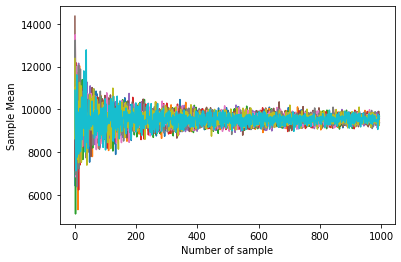

In [288]:
age_51_55_mean_trend=[]
for i in range(10):
    for n in range(5,1000):
        sample_mean=df.loc[df["Age"]=="51-55","Purchase"].sample(n).mean()
        age_51_55_mean_trend.append(sample_mean)
    plt.plot(age_51_55_mean_trend)
    age_51_55_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

Text(0, 0.5, 'Sample Mean')

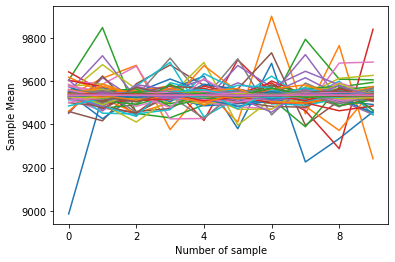

In [294]:
age_51_55_mean_trend=[]
for n in range(500, len(df.loc[df["Age"]=="51-55","Purchase"]),500):
    for i in range(10):
        sample_mean=df.loc[df["Age"]=="51-55","Purchase"].sample(n).mean()
        age_51_55_mean_trend.append(sample_mean)
    plt.plot(age_51_55_mean_trend)
    age_51_55_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

In [295]:
age_55=df.loc[df['Age']=="55+","Purchase"]
age_55.mean(),age_55.std()

(9336.280459449405, 5011.4939956034605)

<AxesSubplot: ylabel='Count'>

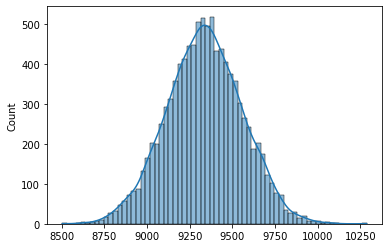

In [296]:
#Confidence Interval for Age 55+
n=500
sample_500_55=[]
for i in range(10000):
    sample_mean=np.random.choice(age_55, size=n).mean()
    sample_500_55.append(sample_mean)
sns.histplot(sample_500_55,kde=True)

In [297]:
np.mean(sample_500_55), np.std(sample_500_55)

(9336.475953399999, 220.82141657410457)

In [298]:
#90% Confidence Interval for Age 55+
CI_500_90_55=np.percentile(sample_500_55,[5,95])
CI_500_90_55

array([8971.7952, 9697.891 ])

In [299]:
#95% Confidence Interval for Age 55+
CI_500_95_55=np.percentile(sample_500_55,[2.5,97.5])
CI_500_95_55

array([8896.8618, 9761.9741])

In [300]:
#99% Confidence Interval for Age 55+
CI_500_99_55=np.percentile(sample_500_55,[0.5,99.5])
CI_500_99_55

array([8778.81471, 9908.18422])

<AxesSubplot: ylabel='Count'>

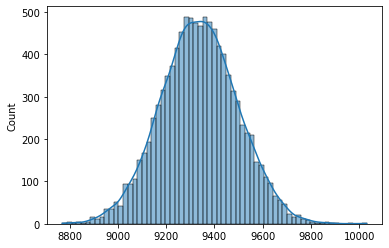

In [301]:
#Confidence Interval for Age 55+
n=1000
sample_1000_55=[]
for i in range(10000):
    sample_mean=np.random.choice(age_55, size=n).mean()
    sample_1000_55.append(sample_mean)
sns.histplot(sample_1000_55,kde=True)

In [302]:
np.mean(sample_1000_55), np.std(sample_1000_55)

(9336.827269500001, 158.96809823104468)

In [303]:
#90% Confidence Interval for Age 55+
CI_1000_90_55=np.percentile(sample_1000_55,[5,95])
CI_1000_90_55

array([9076.2878 , 9601.30765])

In [304]:
#95% Confidence Interval for Age 55+
CI_1000_95_55=np.percentile(sample_1000_55,[2.5,97.5])
CI_1000_95_55

array([9027.390325, 9647.246025])

In [305]:
#99% Confidence Interval for Age 55+
CI_1000_99_55=np.percentile(sample_1000_55,[0.5,99.5])
CI_1000_99_55

array([8932.286325, 9748.10137 ])

<AxesSubplot: ylabel='Count'>

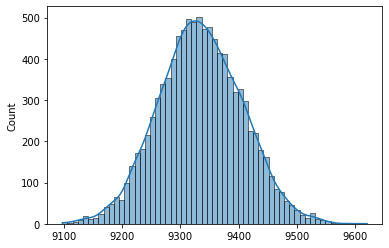

In [306]:
#Confidence Interval for Age 55+
n=5000
sample_5000_55=[]
for i in range(10000):
    sample_mean=np.random.choice(age_55, size=n).mean()
    sample_5000_55.append(sample_mean)
sns.histplot(sample_5000_55,kde=True)

In [307]:
np.mean(sample_5000_55), np.std(sample_5000_55)

(9334.49653622, 71.58858158907817)

In [308]:
#90% Confidence Interval for Age 55+
CI_5000_90_55=np.percentile(sample_5000_55,[5,95])
CI_5000_90_55

array([9218.04469, 9451.81407])

In [309]:
#95% Confidence Interval for Age 55+
CI_5000_95_55=np.percentile(sample_5000_55,[2.5,97.5])
CI_5000_95_55

array([9195.164965, 9475.84213 ])

In [310]:
#99% Confidence Interval for Age 55+
CI_5000_99_55=np.percentile(sample_5000_55,[0.5,99.5])
CI_5000_99_55

array([9148.91467 , 9525.182382])

<AxesSubplot: ylabel='Count'>

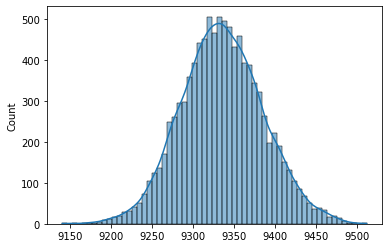

In [311]:
#Confidence Interval for Age 55+
n=10000
sample_10000_55=[]
for i in range(10000):
    sample_mean=np.random.choice(age_55, size=n).mean()
    sample_10000_55.append(sample_mean)
sns.histplot(sample_10000_55,kde=True)

In [312]:
np.mean(sample_10000_55), np.std(sample_10000_55)

(9335.55776177, 49.90342847498073)

In [313]:
#90% Confidence Interval for Age 55+
CI_10000_90_55=np.percentile(sample_10000_55,[5,95])
CI_10000_90_55

array([9255.17783, 9419.47813])

In [314]:
#95% Confidence Interval for Age 55+
CI_10000_95_55=np.percentile(sample_10000_55,[2.5,97.5])
CI_10000_95_55

array([9239.85147, 9435.68687])

In [315]:
#99% Confidence Interval for Age 55+
CI_10000_99_55=np.percentile(sample_10000_55,[0.5,99.5])
CI_10000_99_55

array([9205.461254, 9467.320557])

Text(0, 0.5, 'Sample Mean')

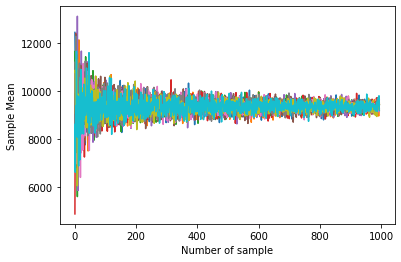

In [316]:
age_55_mean_trend=[]
for i in range(10):
    for n in range(5,1000):
        sample_mean=df.loc[df["Age"]=="55+","Purchase"].sample(n).mean()
        age_55_mean_trend.append(sample_mean)
    plt.plot(age_55_mean_trend)
    age_55_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

Text(0, 0.5, 'Sample Mean')

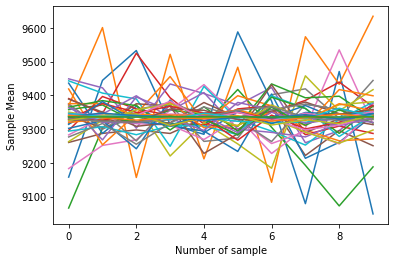

In [327]:
age_55_mean_trend=[]
for n in range(500, len(df.loc[df["Age"]=="55+","Purchase"]),500):
    for i in range(10):
        sample_mean=df.loc[df["Age"]=="55+","Purchase"].sample(n).mean()
        age_55_mean_trend.append(sample_mean)
    plt.plot(age_55_mean_trend)
    age_55_mean_trend=[]
plt.xlabel("Number of sample")
plt.ylabel("Sample Mean")

<AxesSubplot: ylabel='Density'>

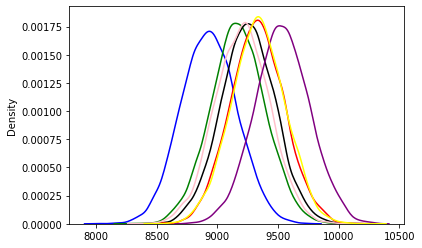

In [318]:
#Overlapping Interval for 500 samples in Age
sns.kdeplot(sample_500_0_17, color="blue")
sns.kdeplot(sample_500_18_25, color="green")
sns.kdeplot(sample_500_26_35, color="black")
sns.kdeplot(sample_500_36_45, color="red")
sns.kdeplot(sample_500_46_50, color="pink")
sns.kdeplot(sample_500_51_55, color="purple")
sns.kdeplot(sample_500_55, color="yellow")

<AxesSubplot: ylabel='Count'>

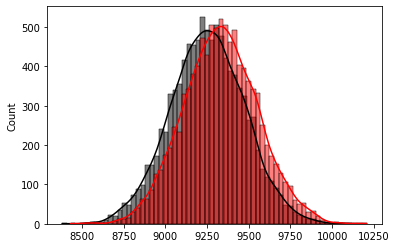

In [319]:
sns.histplot(sample_500_26_35, kde=True, color="black")
sns.histplot(sample_500_36_45,kde=True,color="red")

<AxesSubplot: ylabel='Count'>

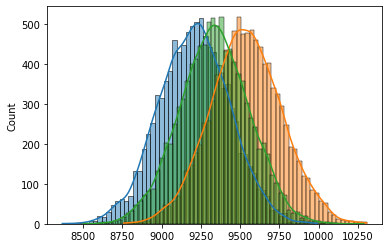

In [320]:
sns.histplot(sample_500_46_50, kde=True)
sns.histplot(sample_500_51_55,kde=True)
sns.histplot(sample_500_55,kde=True)

<AxesSubplot: ylabel='Count'>

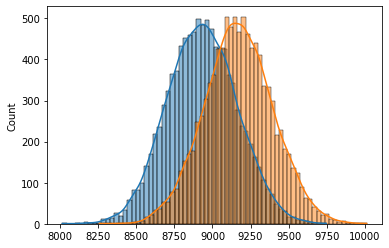

In [321]:
sns.histplot(sample_500_0_17, kde=True)
sns.histplot(sample_500_18_25,kde=True)

<AxesSubplot: ylabel='Count'>

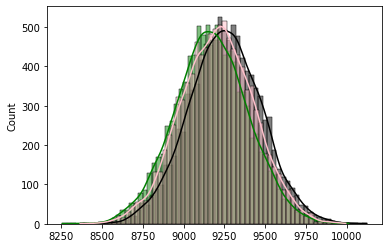

In [322]:
sns.histplot(sample_500_26_35, kde=True, color="black")
sns.histplot(sample_500_18_25,kde=True, color="green")
sns.histplot(sample_500_46_50, kde=True, color="pink")

<AxesSubplot: ylabel='Count'>

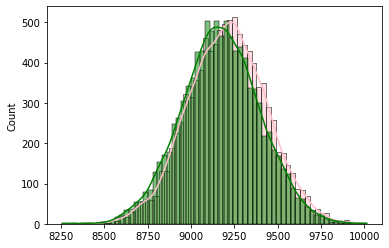

In [323]:
sns.histplot(sample_500_46_50,kde=True, color="pink")
sns.histplot(sample_500_18_25,kde=True, color="green")

<AxesSubplot: ylabel='Density'>

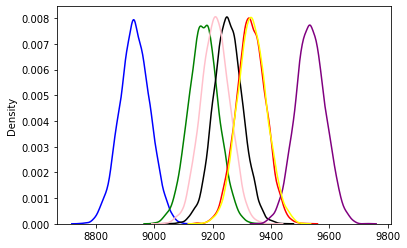

In [324]:
#Overlapping Interval for 10000 samples in Age
sns.kdeplot(sample_10000_0_17, color="blue")
sns.kdeplot(sample_10000_18_25, color="green")
sns.kdeplot(sample_10000_26_35, color="black")
sns.kdeplot(sample_10000_36_45, color="red")
sns.kdeplot(sample_10000_46_50, color="pink")
sns.kdeplot(sample_10000_51_55, color="purple")
sns.kdeplot(sample_10000_55, color="yellow")

<AxesSubplot: ylabel='Count'>

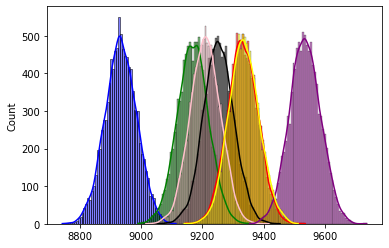

In [325]:
sns.histplot(sample_10000_0_17, kde=True, color="blue")
sns.histplot(sample_10000_18_25,kde=True, color="green")
sns.histplot(sample_10000_26_35,kde=True, color="black")
sns.histplot(sample_10000_36_45,kde=True, color="red")
sns.histplot(sample_10000_46_50,kde=True, color="pink")
sns.histplot(sample_10000_51_55,kde=True, color="purple")
sns.histplot(sample_10000_55, kde=True, color="yellow")

<AxesSubplot: ylabel='Count'>

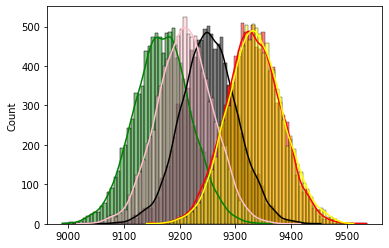

In [326]:
#sns.histplot(sample_10000_0_17, kde=True, color="blue")
sns.histplot(sample_10000_18_25,kde=True, color="green")
sns.histplot(sample_10000_26_35,kde=True, color="black")
sns.histplot(sample_10000_36_45,kde=True, color="red")
sns.histplot(sample_10000_46_50,kde=True, color="pink")
#sns.histplot(sample_10000_51_55,kde=True, color="purple")
sns.histplot(sample_10000_55, kde=True, color="yellow")

# Business Insights

* We can observe based on this analysis,  city category B has a higher number of transactions and a lower number of customers, and city category C has a higher number of customers and a lower number of transactions.
* Based on male and female customers' spending analysis, we can say that female customers have lower spending compared to male customers spending.
* Based on the analysis of the customer's marital status, we have observed that customers have no major difference in the expense per transaction.
* We can say that customers have similar nature of spending irrespective of marital status from the analysis.
* Based on the customers spending as per their age groups, we can observe that customers in the age group of 0-17 years have lower spending than others, and customers in the age group of 51-55 years have higher spending per transaction
* Customers having the age group of 36-45 years and 55+ years have complete overlapping in distribution. so we can say that both have a similar mean of expenses pending per transactions

# Recommendations

* From the above insights, we can recommend that city category B has a higher no of transactions per customer so, we can provide enough marketing to increase the number of customers to increase revenue in city category B.
* We can recommend that city category C has a higher number of customers, but the number of transactions for the city category is less, so we can provide customers with some offers or discounts to increase the number of transactions in city category C.
* From the above insights, we can say that male customers have higher spending whereas female customers have lower spending, so we should focus on different marketing strategies for both male and female customers to increase sales.
* For analysis based on marital status, we observed that there is not much difference in the spending, so we can follow the same strategies for attracting customers based on their spending.
* From the age-based analysis, we observed that age group 0-17 years customers have less spending which can be considered as children or teenagers, who can be considered to have lower income compared to other age group customers, so we should focus on needful products for their age categories.
* From the age-based analysis, we can observe that the age group 51-55 has higher spending than other groups, so we should attract those customers by providing varieties of products that attract those customers.
* From the age-based analysis, other age groups have almost similar kind of trends of spending per transaction. so we can follow the same strategies to attract those customers.
